<div style="overflow:auto;">
    <div style="float:left; margin-right:10px;">
        <img width='120' height='120' src='https://cityme.novaims.unl.pt/images/footer/novaims.png'>
    </div>
    <div>
        <h4>This analysis is conducted as part of the "Business Cases with Data Science" course, a component of the Master's program in Data Science and Advanced Analytics at the Nova Information Management School.</h4>  
        <h1 style="background-color: SeaGreen; color: white; display: inline-block;"><b>Business Cases with Data Science Case 2: Monthly Sales Forecast</b></h1>
    </div>
</div>

***
### Business Understanding and Data Understanding Notebook

Group V 2023/2024: 
- Pedro Catarro, 20230463
</div> 
***

In [1]:
# pip list

In [2]:
# !pip install numpy==1.24.3
# !pip install pandas==1.5.3
# !pip install matplotlib==3.7.1
# !pip install seaborn==0.12.2 
# !pip install scipy==1.10.1   
# !pip install scikit-learn==1.3.0 
# !pip install missingno==0.5.2 
# !pip install plotly==5.18.0       

In [3]:
# Importing Libraries
import os
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
import matplotlib.ticker as mtick
import matplotlib.cm as cm
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import missingno as msno
import plotly.express as px #for the visuals with this pach we use this source: https://www.datacamp.com/tutorial/python-plotly-express-tutorial and also Chat Gpt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [4]:
import warnings
warnings.filterwarnings("ignore", message="X does not have valid feature names", category=UserWarning)
warnings.filterwarnings("ignore", message="The default value of `normalized_stress` will change", category=FutureWarning)

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
custom_palette = ['#6A0572', '#0D6C8B', '#D62828', '#FFFFFF']

`Note` The markdown 'customizations' have this source: https://www.ibm.com/docs/en/watson-studio-local/1.2.3?topic=notebooks-markdown-jupyter-cheatsheet

<a id = "Index"></a>

## CRISP-DM Index
1. [Business Understanding](#Business-Understanding)
2. [Data Understanding](#Data-Understanding)
3. [Data Preparation](#DataPreparation)

[CRISP-DM GUIDE](https://www.ibm.com/docs/it/SS3RA7_18.3.0/pdf/ModelerCRISPDM.pdf)
***

<a id = "Business-Understanding"></a>
## 1. Business Understanding

We're starting by getting to know Siemens' business. The `Business Understanding` phase is super important because it helps us understand what Siemens wants to achieve and what problems they're facing. By doing this, we make sure our work lines in future phases are align with Siemens' big goals.

`Source of Information`: We use the Siemens Annual Report (2023) for this effect. [Siemens Annual Report 2023](https://assets.new.siemens.com/siemens/assets/api/uuid:be1828a9-2368-4c3b-a85f-f1bcb1f14a59/Siemens-Annual-Report-2023.pdf), and the info from the Presentation given on March 2024 (at NOVA IMS)
***

### 1.1 Business Objectives

#### `1.1.1. Siemens Group Business Background`

Siemens is a technology group that is active in nearly all countries of the world, focusing on the areas of automation and digitalization in
the process and manufacturing industries, intelligent infrastructure for buildings and distributed energy systems, smart mobility solutions
for rail transport, and medical technology and digital healthcare services.
Siemens comprises Siemens Aktiengesellschaft (Siemens AG), a stock corporation under the Federal laws of Germany, as the parent
company, and its subsidiaries. Our Company is incorporated in Germany, with corporate headquarters situated in Munich. As of
September 30, 2023, Siemens had around 320,000 employees.
As of September 30, 2023, Siemens has the following reportable segments: Digital Industries, Smart Infrastructure, Mobility and
Siemens Healthineers, which together form our “Industrial Business” and Siemens Financial Services (SFS), which supports the activities
of our industrial businesses and also conducts its own business with external customers. Furthermore, we report results for Portfolio
Companies, which comprises businesses that are managed separately to improve their performance.
Our reportable segments and Portfolio Companies may do business with each other, leading to corresponding orders and revenue. Such
orders and revenue are eliminated on Group level.




The main countries where Siemens has a strong presence include:

- Germany
- EU w/Germany (specially France)
- United States
- China
- India
- United Kingdom
- United Arab Emirates

(anual report 2018-2022)

#### `1.1.2. Business Objectives`

#### `Problem Description:`

The project aims to address the following motivations:

- **Efficiency**: Automating sales forecasting to save time and reduce manual effort.
- **Bias Reduction**: Implementing data-driven algorithms to minimize human biases in forecasting.
- **Data Centralization**: Utilizing AI to gather and analyze data from multiple sources, enhancing accuracy compared to manual methods.
- **Cost Savings**: Improving forecasting accuracy to allocate resources more effectively and reduce potential losses from poor forecasting.

#### `Business Questions:`

- What are the primary factors influencing sales trends in the targeted product groups?
- How do macroeconomic indices impact sales performance within the German market?
- Are there any seasonal patterns or trends affecting sales fluctuations?
- What are the key drivers behind variations in sales volumes over the specified time period?
- How can historical sales data be leveraged to predict future sales trends accurately?

#### `Business Requirements:`

`Desirable Outputs of this Data Science Project`

- Reusability and Scale: The input/tool should be interchangeable and usable in other businesses.
- Integration into the Business Process: The solution should integrate into the existing business tools and system landscape.
- Value Addition: The solution must generate a net positive value for the organization.
- Viability: the cost of the use case must suprass the expected value add of it.
- Feasibility: Model Performance (e.g., accuracy)
- Implementation: realistic effort required for full development and maintenance of the solution.
- Effectiveness for Business Professionals

and


- Targeting selected product groups within one Business Unit of the Smart Infrastructure Division.
- Focusing on the largest country of the business unit, Germany.
- Utilizing sales data from October 2018 to April 2022.
- Incorporating important macroeconomic indices.

#### `Expected Benefits in Business Terms:`

- Sales forecast on a monthly basis.
- Addressing the challenge of generating a monthly sales forecast based on real data from a Siemens business unit in Germany.

#### `1.1.3. Success Criteria`

Evaluation: Quantitative evaluation of score (Metric: RMSE) using a separate test set (May 2022 to February 2023 – 10 months).
***

### 1.2 Assessing the Situation

#### `1.2.1. Data are available for analysis`

#### Provided by the company:
- Sales data from October 2018 to April 2022 
- Important macro-economical indices 
- Macro economical data
• Daily sales data per GCK (product groups) in EUR
• Training set (daily): 'Sales data.csv'
• Test set (monthly): 'Test Set Template.csv'
• Important macro-economic indices for Siemens in its most
important countries: 'Market data.xlsx'
• This includes for example:
• Production Index Machinery & Electricals
• Shipments Index Machinery & Electricals
• Price of Base Metals
• Price of Energy
• Price of Metals & Minerals
• Price of Natural gas index
• Price of Crude oil, average
• Price of Copper
• Producer Prices

#### Extra:
`Macro Indicators`
- [x] Interest Rates. [Source](https://stats.oecd.org/#)
- [x] Consumer Price Index (CPI) of Germany, USA, European Union, and China. [Source](https://stats.oecd.org/viewhtml.aspx?datasetcode=PRICES_CPI&lang=en#)
- [x] Exchange Rates: Euro-Dollar Exchange Rate, Euro-SEK Exchange Rate, Euro-Yuan Exchange Rate, and Euro-Pound Exchange Rate. [Source](https://data.ecb.europa.eu/search-results?searchTerm=Exchange+rates+&filterSequence=frequency.dataset&sort=relevance&filterType=basic&showDatasetModal=false&filtersReset=false&resetAll=false&dataset%5B%5D=Exchange+Rates++%28EXR%29&frequency%5B%5D=M)
- [x] Nominal Effective Exchange Rates [Source](https://data.bis.org/topics/EER/data?rows=REF_AREA&cols=TIME_PERIOD&settings=asc%7Cdesc%7Cname&data_view=table&filter=EER_BASKET%3DB%255ETIMESPAN%3D2018-01-01_2024-04-02%255EFREQ%3DM%255EEER_TYPE%3DN)
- [x] Gross Domestic Product (GDP). [Source](https://stats.oecd.org/index.aspx?lang=en#)
- [x] Unemployment Rate. [Source](https://stats.oecd.org/index.aspx?lang=en#) 
- [ ] Consumer Confidence Index of Germany, USA, European Union, and China. [Source](https://stats.oecd.org/index.aspx?lang=en#)
- [ ] Business Confidence Indicator. [Source](https://stats.oecd.org/index.aspx?lang=en#)
- [ ] Business Tendency (Manufacturing) - Germany. [Source](https://fred.stlouisfed.org/series/BSCICP03DEM665S)
- [ ] Business Tendency (Manufacturing) - EU. [Source]()
- [ ] Business Tendency (Manufacturing) - UK. [Source]()
- [ ] Business Tendency (Manufacturing) - US. [Source]()
- [ ] Business Tendency (Manufacturing) - China. [Source]()
- [ ] Business Tendency (Manufacturing) - India. [Source]()
- [ ] Business Tendency (Construction) - EU (19 Countries)
- [ ] Geopolitical Events and Conflict Data - [ACLED (Armed Conflict Location & Event Data Project)](https://acleddata.com/)

#### Other Indicators
- [ ] Siemens Stock Performance. [Source](https://www.investing.com/equities/siemens-historical-data)

***

<a id = "Data-Understanding"></a>
    
## 2. Data Understanding

[2.1 Data Loading](#Data-Loading-and-Description)

[2.2 Exploratory Data Analysis](#EDA)

 - [2.2.1. Data Types](#Data-Types)

 - [2.2.2. Univariate EDA: Descriptive Summary](#Descriptive-Summary)
 
 - [2.2.3. Univariate EDA: Missing Values](#Missing-Values)

 - [2.2.4. Univariate EDA: Data Visualization](#Univariate-Vizualization)
 
 - [2.2.5. Bivariate EDA: Data Visualization](#BivariateVizualization) 
 
 - [2.2.6. Multvariate EDA: Duplicates](#multivariate) 
 
 [Back to Index](#Index)
 

#### Functions to load data from the same source (to be in the right format) 

In [7]:
#OECD DATA
def process_data(file_path, countries, start_date, end_date, index_column='TIME', value_column='Value'):
    # Keep only the important columns 'Country', 'TIME' e 'Value'
    data = pd.read_csv(file_path, sep=',', usecols=['Country', index_column, value_column])

    # keep only the relevant countries for analysis 
    data = data[data['Country'].isin(countries)]

    # put time in the index and countries as columns to create a table format 
    data = data.pivot_table(index=index_column, columns='Country', values=value_column, aggfunc='first')
    data.columns.name = None
    
    # Filter data by date range
    data = data.loc[start_date:end_date]
    
    # Renaming the index
    data.index.name = 'Year-Month'

    return data

# List of relevant countries for analysis 
countries = ['Euro area (19 countries)',
             'Euro area (20 countries)',
             'OECD - Europe',
             'Germany',
             'France',
             'United Kingdom',
             'United States',
             'Russia',
             'China',
             "China (People's Republic of)",
             'Saudi Arabia',
             'India']

start_date = '2017-10'
end_date = '2022-04'

In [8]:
#FRED Economic Research

def preprocess_FRED(file_path):
    # Read the data from the CSV file
    df = pd.read_csv(file_path, sep=',')

    # Convert DATE column to datetime format
    df['DATE'] = pd.to_datetime(df['DATE'])

    # Set DATE column as index
    df.set_index('DATE', inplace=True)

    # Rename the index to 'Year-Month' and format it as 'yyyy-mm'
    df.index = df.index.strftime('%Y-%m')
    df.index.name = 'Year-Month'

    return df

<a id = "Data-Loading-and-Description"></a>
### 2.1. Data Loading

[Back to Index](#Index)

### `1. Sales Data`

In [11]:
#dataframe with the Case2_Sales data source
df = pd.read_csv('New_Case2_Sales_Data.csv', sep=';')
df.head(1)

DATE Year-Month  DAY  MONTH  YEAR   P1  P11   P6   P8  P12  P16   P4  \
0  01/10/2018    2018-10    1     10  2018  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    P5   P3  P9  P14  P13  P20  P36  Sales_EUR  
0  0.0  0.0 NaN  NaN  NaN  NaN  NaN        0.0

As we can see, we previously separated the date column to facilitate analysis. Additionally, we created a merged column with month and year to simplify monthly analysis. We also transposed the Mapped_GCK column to make each product a column with its respective sales. Now, we have a tabular format that is much easier for analysis purposes. While it's possible to achieve this using Python, as mentioned earlier, it's easier and more efficient to accomplish it using Power Query and Excel.

`Analysis Granularity = monthly sales forecast`

Given that our project's granularity is a monthly sales forecast, we will define the month-year column as the index (dropping the date and the day) and aggregate the sales at this stage.  This adjustment aims to simplify the dataset, making it more manageable for analysis:

In [12]:
df.drop(columns=['DATE', 'DAY'], inplace=True)
grouped_df = df.groupby(['YEAR', 'MONTH', 'Year-Month']).sum().reset_index()
grouped_df.set_index('Year-Month', inplace=True)
grouped_df.head(1)

YEAR  MONTH           P1        P11        P6         P8  \
Year-Month                                                             
2018-10     2018     10  36098918.79  1021303.5  369231.6  586052.74   

                 P12        P16         P4          P5          P3       P9  \
Year-Month                                                                    
2018-10     28686.33  333196.87  397760.69  2499061.19  8089465.96  3219.32   

               P14      P13      P20     P36    Sales_EUR  
Year-Month                                                 
2018-10     5770.0  27666.1  4563.14  6474.6  49471370.83

In [13]:
sales_df = grouped_df.copy()

<span style="background-color: red; padding: 5px;">Our range: 2018-10 - 2022-04</span> 

We are going to use a copy of the original Df to make the necessary modifications from now on: "Modifications to the data or indices of the copy will not be reflected in the original object" Source: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.copy.html

In [14]:
#Lets see the shape of the Datset (rows and columns respectively)
sales_df.shape

(43, 17)

We have a support pivot table to confirm if we dont have any data loss- will be avaiable in Support files as well. All seems fine

### `2. Important macro-economic indices for Siemens in its most important countries: 'Market data.xlsx'`
Tambem usamos o excel para meter este dataset em formato tabelar

In [16]:
Market_df = pd.read_csv('New_Case2_Market_Data.csv', sep=';')
Market_df.drop(columns=['Unnamed: 48',	'Unnamed: 49',	'Unnamed: 50',	'Unnamed: 51'], inplace=True)
Market_df.set_index('Index 2010=100 (if not otherwise noted)', inplace=True)

Market_df.index.name = 'Year-Month'
Market_df.rename(columns={
    'China Production Index Machinery & Electricals': 'CHN_M&E_Prod',
    'China Shipments Index Machinery & Electricals': 'CHN_M&E_Ship',
    'France Production Index Machinery & Electricals': 'FRA_M&E_Prod',
    'France Shipments Index Machinery & Electricals': 'FRA_M&E_Ship',
    'Germany Production Index Machinery & Electricals': 'DEU_M&E_Prod',
    'Germany Shipments Index Machinery & Electricals': 'DEU_M&E_Ship',
    'Italy Production Index Machinery & Electricals': 'ITA_M&E_Prod',
    'Italy Shipments Index Machinery & Electricals': 'ITA_M&E_Ship',
    'Japan Production Index Machinery & Electricals': 'JPN_M&E_Prod',
    'Japan Shipments Index Machinery & Electricals': 'JPN_M&E_Ship',
    'Switzerland Production Index Machinery & Electricals': 'CHE_M&E_Prod',
    'Switzerland Shipments Index Machinery & Electricals': 'CHE_M&E_Ship',
    'United Kingdom Production Index Machinery & Electricals': 'GBR_M&E_Prod',
    'United Kingdom Shipments Index Machinery & Electricals': 'GBR_M&E_Ship',
    'United States Production Index Machinery & Electricals': 'USA_M&E_Prod',
    'United States Shipments Index Machinery & Electricals': 'USA_M&E_Ship',
    'Europe Production Index Machinery & Electricals': 'EU_M&E_Prod',
    'Europe Shipments Index Machinery & Electricals': 'EU_M&E_Ship',
    'World: Price of Base Metals': 'WLD_P_Metals',
    'World: Price of Energy': 'WLD_P_Energy',
    'World: Price of Metals  & Minerals': 'WLD_P_Minerals',
    'World: Price of Natural gas index': 'WLD_P_Natural_Gas',
    'World: Price of Crude oil, average': 'WLD_P_Crude_Oil',
    'World: Price of Copper': 'WLD_P_Copper',
    'Producer Prices United States: Electrical equipment': 'USA_Producer_Prices_Elect',
    'Producer Prices United Kingdom: Electrical equipment': 'GBR_Producer_Prices_Elect',
    'Producer Prices Italy: Electrical equipment': 'ITA_Producer_Prices_Elect',
    'Producer Prices France: Electrical equipment': 'FRA_Producer_Prices_Elect',
    'Producer Prices Germany: Electrical equipment': 'DEU_Producer_Prices_Elect',
    'Producer Prices China: Electrical equipment': 'CHN_Producer_Prices_Elect',
    'Production index United States: Machinery and equipment n.e.c.': 'USA_Prod_Index_M&E',
    'Production index World: Machinery and equipment n.e.c.': 'WLD_Prod_Index_M&E',
    'Production index Switzerland: Machinery and equipment n.e.c.': 'CHE_Prod_Index_M&E',
    'Production index United Kingdom: Machinery and equipment n.e.c.': 'GBR_Prod_Index_M&E',
    'Production index Italy: Machinery and equipment n.e.c.': 'ITA_Prod_Index_M&E',
    'Production index Japan: Machinery and equipment n.e.c.': 'JPN_Prod_Index_M&E',
    'Production index France: Machinery and equipment n.e.c.': 'FRA_Prod_Index_M&E',
    'Production index Germany: Machinery and equipment n.e.c.': 'DEU_Prod_Index_M&E',
    'Production index United States: Electrical equipment': 'USA_Prod_Index_Elect',
    'Production index World: Electrical equipment': 'WLD_Prod_Index_Elect',
    'Production index Switzerland: Electrical equipment': 'CHE_Prod_Index_Elect',
    'Production index United Kingdom: Electrical equipment': 'GBR_Prod_Index_Elect',
    'Production index Italy: Electrical equipment': 'ITA_Prod_Index_Elect',
    'Production index Japan: Electrical equipment': 'JPN_Prod_Index_Elect',
    'Production index France: Electrical equipment': 'FRA_Prod_Index_Elect',
    'Production index Germany: Electrical equipment': 'DEU_Prod_Index_Elect'
}, inplace=True)

Market_df.head(1)

CHN_M&E_Prod  CHN_M&E_Ship  FRA_M&E_Prod  FRA_M&E_Ship  \
Year-Month                                                           
 2004m2               17            17           112            83   

            DEU_M&E_Prod  DEU_M&E_Ship  ITA_M&E_Prod  ITA_M&E_Ship  \
Year-Month                                                           
 2004m2               83            79           124            87   

            JPN_M&E_Prod  JPN_M&E_Ship  CHE_M&E_Prod  CHE_M&E_Ship  \
Year-Month                                                           
 2004m2              109           110          91.0          90.0   

            GBR_M&E_Prod  GBR_M&E_Ship  USA_M&E_Prod  USA_M&E_Ship  \
Year-Month                                                           
 2004m2              111          74.0           108          79.0   

            EU_M&E_Prod  EU_M&E_Ship  WLD_P_Metals  WLD_P_Energy  \
Year-Month                                                         
 2004m2              97           80         54.04         44.12   

            WLD_P_Minerals  WLD_P_Natural_Gas  WLD_P_Crude_Oil  WLD_P_Copper  \
Year-Month                                                                     
 2004m2              48.75              87.08            39.64         36.62   

            United States: EUR in LCU  USA_Producer_Prices_Elect  \
Year-Month                                                         
 2004m2                             1                         79   

            GBR_Producer_Prices_Elect  ITA_Producer_Prices_Elect  \
Year-Month                                                         
 2004m2                          81.0                         93   

            FRA_Producer_Prices_Elect  DEU_Producer_Prices_Elect  \
Year-Month                                                         
 2004m2                           NaN                         93   

            CHN_Producer_Prices_Elect  USA_Prod_Index_M&E  WLD_Prod_Index_M&E  \
Year-Month                                                                      
 2004m2                           NaN                 102                  98   

            CHE_Prod_Index_M&E  GBR_Prod_Index_M&E  ITA_Prod_Index_M&E  \
Year-Month                                                               
 2004m2                   97.0                 106                 117   

            JPN_Prod_Index_M&E  FRA_Prod_Index_M&E  DEU_Prod_Index_M&E  \
Year-Month                                                               
 2004m2                    111                 118                  81   

            USA_Prod_Index_Elect  WLD_Prod_Index_Elect  CHE_Prod_Index_Elect  \
Year-Month                                                                     
 2004m2                      118                   NaN                  81.0   

            GBR_Prod_Index_Elect  ITA_Prod_Index_Elect  JPN_Prod_Index_Elect  \
Year-Month                                                                     
 2004m2                      121                   142                   106   

            FRA_Prod_Index_Elect  DEU_Prod_Index_Elect  
Year-Month                                              
 2004m2                      102                    86

<span style="background-color: red; padding: 5px;">Data preparation Notes:</span> Put the date in the same format as the sales_df and set it as index as well. give smaller names to the columns 

In [17]:
Market_df.shape

(219, 47)

Same shape as the one in the support excel (we remove the 4 columns at the end with no info)

### `3. Monthly Interest Rates`

WHY....

In [38]:
interest_rates = process_data('Monthly Interest rates.csv', countries, start_date, end_date)

interest_rates.rename(columns={
    "China (People's Republic of)": 'CHN_IR',
    "Euro area (19 countries)": 'EURO(19)_IR',
    'France': 'FRA_IR',
    'Germany': 'DEU_IR',
    'India': 'IND_IR',
    'Russia': 'RUS_IR',
    'United Kingdom': 'GBR_IR',
    'United States': 'USA_IR'
}, inplace=True)

interest_rates.head(1)

CHN_IR  EURO(19)_IR    FRA_IR  DEU_IR  IND_IR  RUS_IR  GBR_IR  \
Year-Month                                                                  
2017-10        4.7       -0.359  0.811955  0.3725    6.25    8.59  1.3816   

            USA_IR  
Year-Month          
2017-10       2.36

We took care of the range in the function.

### `4. Consumer Price Index (CPI)`

In [39]:
cpi_df = process_data('Consumer price indices (CPIs).csv', countries, start_date, end_date)

cpi_df.rename(columns={
    "China (People's Republic of)": 'CHN_CPI',
    "Euro area (20 countries)": 'EURO(19)_CPI',
    'France': 'FRA_CPI',
    'Germany': 'DEU_CPI',
    'India': 'IND_CPI',
    'OECD - Europe': 'OCDE(EU)_CPI',
    'Russia': 'RUS_cpi',
    'Saudi Arabia': 'SAU_CPI',
    'United Kingdom': 'GBR_CPI',
    'United States': 'USA_CPI'
}, inplace=True)

cpi_df.head(1)

CHN_CPI  EURO(19)_CPI   FRA_CPI   DEU_CPI  IND_CPI  OCDE(EU)_CPI  \
Year-Month                                                                     
2017-10       104.2        102.34  101.5042  102.5171    135.3      104.2159   

            RUS_cpi  SAU_CPI  GBR_CPI   USA_CPI  
Year-Month                                       
2017-10        0.44    97.23    105.5  1.114445

### `5. Exchange Rates`

In [40]:
exchange_rates = pd.read_csv('ECB Exchange rates.csv', sep=',')

# Drop unnecessary columns in this phase to optimize the work flow
exchange_rates = exchange_rates.drop(['TIME PERIOD', 'South African rand/Euro (EXR.M.ZAR.EUR.SP00.A)'],
                                     axis=1)
exchange_rates.set_index('DATE', inplace=True)
exchange_rates.index.name = 'Year-Month'
exchange_rates.rename(columns={
    'Chinese yuan renminbi/Euro (EXR.M.CNY.EUR.SP00.E)': 'CNY/EUR',
    'UK pound sterling/Euro (EXR.M.GBP.EUR.SP00.A)': 'GBP/EUR',
    'Hong Kong dollar/Euro (EXR.M.HKD.EUR.SP00.A)': 'HKD/EUR',
    'Indian rupee/Euro (EXR.M.INR.EUR.SP00.A)': 'INR/EUR',
    'Russian rouble/Euro (EXR.M.RUB.EUR.SP00.A)': 'RUB/EUR',
    'Swedish krona/Euro (EXR.M.SEK.EUR.SP00.A)': 'SEK/EUR',
    'US dollar/Euro (EXR.M.USD.EUR.SP00.A)': 'USD/EUR'
}, inplace=True)

exchange_rates.head(1)

CNY/EUR  GBP/EUR  HKD/EUR  INR/EUR  RUB/EUR  SEK/EUR  USD/EUR
Year-Month                                                               
1999-01-31      NaN  0.70291   8.9942      NaN  26.6898   9.0826   1.1608

<span style="background-color: red; padding: 5px;">Data preparation Notes:</span> Make sure to have the same range of dates as the sales file. Put date in the format yyyy-mm as well.

### `6. Nominal Effective Exchange Rates`

In [42]:
effective_exchange_rates = pd.read_csv('Effective_nominal_exchange_rates.csv', sep=';')

#the dataset as the dates in the columns and the countries in de rows of the column Reference area, so lets transpose that to be in the saem format as the other datasets:
effective_exchange_rates.set_index('Reference area', inplace=True) #it has an index from 0 to 1 (if we transpose it its gonna become the columns) so we need to change that first:
effective_exchange_rates = effective_exchange_rates.transpose() # Transpose the df

#we are also gonna slice the df right now to optimize the work flow (select the countries we want) 
countries1 = ['China', 'Germany', 'Euro area', 'India', 'Russia', 'Saudi Arabia', 'Sweden', 'United Kingdom', 'United States']
effective_exchange_rates = effective_exchange_rates[countries1]
effective_exchange_rates.rename(columns={
    'China': 'CHN_Nominal_ER',
    'Germany': 'DEU_Nominal_ER',
    'Euro area': 'EU_Nominal_ER',
    'India': 'IND_Nominal_ER',
    'Russia': 'RUS_Nominal_ER',
    'Saudi Arabia': 'SAU_Nominal_ER',
    'Sweden': 'SWE_Nominal_ER',
    'United Kingdom': 'GBR_Nominal_ER',
    'United States': 'USA_Nominal_ER'
}, inplace=True)

effective_exchange_rates.head(1)

KeyError: "None of ['Reference area'] are in the columns"

<span style="background-color: red; padding: 5px;">Data preparation Notes:</span> Make sure to have the same range of dates as the sales file. Put date in the format yyyy-mm as well.

### `7. Gross Domestic Product (GDP)`

In [43]:
# We only have the years, so we need to transform them into months by multiplying each year. The year 2022 does not have values because this indicator only exists for the entire year.
GDP_df = pd.read_csv('GDP volume – annual growth rates %.csv', sep=',', usecols=['Country', 'TIME', 'Value'])

# Similar to the others:
GDP_df = GDP_df[GDP_df['Country'].isin(countries)]
GDP_df = GDP_df.pivot_table(index='TIME', columns='Country', values='Value', aggfunc='first')
GDP_df.columns.name = None
GDP_df.rename(columns={
    "China (People's Republic of)": "CHN_GDP",
    "Euro area (19 countries)": "EU_GDP",
    "France": "FRA_GDP",
    "Germany": "DEU_GDP",
    "India": "IND_GDP",
    "Russia": "RUS_GDP",
    "Saudi Arabia": "SAU_GDP",
    "United Kingdom": "GBR_GDP",
    "United States": "USA_GDP"
}, inplace=True)
GDP_df.head(1)

CHN_GDP    EU_GDP  FRA_GDP   DEU_GDP   IND_GDP   RUS_GDP   SAU_GDP  \
TIME                                                                        
2017  6.947196  2.624611  2.29142  2.680231  6.795383  1.825809 -0.069698   

      GBR_GDP   USA_GDP  
TIME                     
2017  2.65507  2.457622

The Gross Domestic Product (GDP) is an annual indicator, meaning that it represents the economic performance of a country over the entire year. As a result, we do not have monthly variations for this variable. To accommodate this, we will assign the same GDP value to each month within the year.

Additionally, it's worth noting that we lack GDP data for the year 2022 in our dataset. This absence is expected since GDP values for 2022 have not been fully reported yet, given that we 'are' currently in April 2022.

### `8. Unemployment Rate`

In [44]:
Unemployment_rates = process_data('Monthly Unemployment Rate.csv', countries, start_date, end_date)
Unemployment_rates.rename(columns={
    'France': 'FRA_Unemployment_Rate',
    'Germany': 'DEU_Unemployment_Rate',
    'United Kingdom': 'GBR_Unemployment_Rate',
    'United States': 'USA_Unemployment_Rate'
}, inplace=True)

Unemployment_rates.head(1)

FRA_Unemployment_Rate  DEU_Unemployment_Rate  \
Year-Month                                                 
2017-10                       9.1                    3.5   

            GBR_Unemployment_Rate  USA_Unemployment_Rate  
Year-Month                                                
2017-10                       4.3                    4.2

### `9. Consumer Confidence Index`
OECD Standardised CCI, Amplitude adjusted (Long term average=100), sa

In [45]:
cci_df = process_data('Consumer Confidence Indicators.csv', countries, start_date, end_date)

cci_df.rename(columns={
    "China (People's Republic of)": 'CHN_CConfidence',
    'France': 'FRA_CConfidence',
    'Germany': 'DEU_CConfidence',
    'India': 'IND_CConfidence',
    'OECD - Europe': 'OCDE(EU)_CConfidence',
    'Russia': 'RUS_CConfidence',
    'United Kingdom': 'GBR_CConfidence',
    'United States': 'USA_CConfidence'
}, inplace=True)

cci_df.head(1)

CHN_CConfidence  FRA_CConfidence  DEU_CConfidence  \
Year-Month                                                      
2017-10             103.366         100.7134         101.8589   

            IND_CConfidence  OCDE(EU)_CConfidence  RUS_CConfidence  \
Year-Month                                                           
2017-10          101.318935              101.3983         100.7786   

            GBR_CConfidence  USA_CConfidence  
Year-Month                                    
2017-10            100.5385          101.444

### `10. Business Confidence Indicator`

In [46]:
bci_df = process_data('Business Confidence Indicators.csv', countries, start_date, end_date)

bci_df.rename(columns={
    "China (People's Republic of)": 'CHN_BConfidence',
    'France': 'FRA_BConfidence',
    'Germany': 'DEU_BConfidence',
    'India': 'IND_BConfidence',
    'OECD - Europe': 'OCDE(EU)_BConfidence',
    'Russia': 'RUS BConfidence',
    'United Kingdom': 'GBR_BConfidence',
    'United States': 'USA_BConfidence'
}, inplace=True)

bci_df.head(1)

CHN_BConfidence  FRA_BConfidence  DEU_BConfidence  \
Year-Month                                                      
2017-10            100.0623         101.9905         102.3743   

            IND_BConfidence  OCDE(EU)_BConfidence  RUS BConfidence  \
Year-Month                                                           
2017-10            99.64857              102.1455       101.465949   

            GBR_BConfidence  USA_BConfidence  
Year-Month                                    
2017-10            103.0027         101.3253

### `11. Business Tendency (Manufacturing) - EU`

In [47]:
EU_bcmanufacturing = preprocess_FRED('Business Tendency (Manufacturing) -EU.csv')
EU_bcmanufacturing.head(1)

BSCICP03EZM665S
Year-Month                 
2017-01           101.24367

### `12. Business Tendency (Manufacturing) - Germany`

In [48]:
DE_bcmanufacturing = preprocess_FRED('Business Tendency (Manufacturing) - DEU.csv')
DE_bcmanufacturing.head(1)

BSCICP03DEM665S
Year-Month                 
2016-11          100.932777

### `13. Business Tendency (Manufacturing) - UK`

In [49]:
UK_bcmanufacturing = preprocess_FRED('Business Tendency (Manufacturing) -UK.csv')
UK_bcmanufacturing.head(1)

BSCICP03GBM665S
Year-Month                 
2017-03          102.789853

### `14. Business Tendency (Manufacturing) - US`

In [50]:
US_bcmanufacturing = preprocess_FRED('Business Tendency (Manufacturing) -US.csv')
US_bcmanufacturing.head(1)

BSCICP03USM665S
Year-Month                 
2017-01          100.619698

### `15. Business Tendency (Manufacturing) - China`

In [51]:
China_bcmanufacturing = preprocess_FRED('Business Tendency (Manufacturing) - China.csv')
China_bcmanufacturing.head(1)

BSCICP03CNM665S
Year-Month                 
2017-02           99.772873

### `16. Business Tendency (Manufacturing) - India`

In [52]:
IN_bcmanufacturing = preprocess_FRED('Business Tendency (Manufacturing) -India.csv')
IN_bcmanufacturing.head(1)

BSCICP03INM665S
Year-Month                 
2017-05            98.14046

### `17. Business Tendency (Construction) - EU (19 Countries)`

In [53]:
EU_bcConstruction = preprocess_FRED('Business Tendency (Construction) - EU (19 Countries).csv')
EU_bcConstruction.head(1)

BCCICP02EZM460S
Year-Month                 
2017-01               -10.6

We are going to merge the business tendency data again because they are already in the right format, and it's better to optimize the subsequent steps instead of having 7 different dataframes. Also lets rename the columns so that we dont get confuse

In [54]:
dfs_to_merge = [EU_bcmanufacturing, DE_bcmanufacturing, UK_bcmanufacturing, US_bcmanufacturing,
                China_bcmanufacturing, IN_bcmanufacturing]

business_tend_manu = dfs_to_merge[0]
for df in dfs_to_merge[1:]:
    business_tend_manu = business_tend_manu.merge(df, left_index=True, right_index=True, how='outer')

business_tend_manu = business_tend_manu.loc[start_date:end_date]

business_tend_manu.rename(columns={
    'BSCICP03EZM665S': 'EUR_Manufacturing_BT',
    'BSCICP03DEM665S': 'DEU_Manufacturing_BT',
    'BSCICP03GBM665S': 'GBR_Manufacturing_BT',
    'BSCICP03USM665S': 'USA_Manufacturing_BT',
    'BSCICP03CNM665S': 'CHN_Manufacturing_BT',
    'BSCICP03INM665S': 'IN_Manufacturing_BT'
}, inplace=True)

EU_bcConstruction.rename(columns={
    'BCCICP02EZM460S': 'EUR_Construction_BT%'
}, inplace=True)

business_tend_const = EU_bcConstruction.loc[start_date:end_date]

business_tend_manu.head(1)

EUR_Manufacturing_BT  DEU_Manufacturing_BT  GBR_Manufacturing_BT  \
Year-Month                                                                     
2017-10               102.502921            102.371451            103.001497   

            USA_Manufacturing_BT  CHN_Manufacturing_BT  IN_Manufacturing_BT  
Year-Month                                                                   
2017-10               101.323754             100.04664            99.680792

In [55]:
business_tend_const.head(1)

EUR_Construction_BT%
Year-Month                      
2017-10                      0.9

### `18. Geopolitical Events and Conflict Data`

As the Russian offensive start in the beginning of 2022 we want to try capture the impact of that  

In [57]:
conflict_data = pd.read_csv('npolitical_violence_events_by_country-month.csv', sep=';')

#changing the date format
month_to_number = {
    'January': '01',
    'February': '02',
    'March': '03',
    'April': '04',
    'May': '05',
    'June': '06',
    'July': '07',
    'August': '08',
    'September': '09',
    'October': '10',
    'November': '11',
    'December': '12'
}

conflict_data['Month'] = conflict_data['Month'].map(month_to_number)

# new column 'Year-Month'
conflict_data['Year-Month'] = conflict_data['Year'].astype(str) + '-' + conflict_data['Month']

# Pivot the df
conflict_data = conflict_data.pivot(index='Year-Month', columns='Country', values='Events')
conflict_data.columns.name = None
conflict_data.rename(columns={
    'Russia': 'RUS_CONFLICT',
    'Ukraine': 'UKR_CONFLICT'
}, inplace=True)

conflict_data.head(1)

RUS_CONFLICT  UKR_CONFLICT
Year-Month                            
2018-01             22.0         717.0

### `19. Siemens Stock Performance`

In [58]:
siemens_stocks = pd.read_csv('SIEGn Historical Data.csv', sep=',')
siemens_stocks.set_index('Date', inplace=True)
siemens_stocks = siemens_stocks[['Change %']]
siemens_stocks.rename(columns={
    'Change %': 'SIESTOCK_%VAR'
}, inplace=True)
siemens_stocks.head(1)

SIESTOCK_%VAR
Date                    
04/01/2024        -0.57%

<a id = "EDA"></a>
    
### 2.2 Exploratory Data Analysis

[Back to Index](#Index)

<a id = "Data-Types"></a>
    
### 2.2.1. Data Types

In [59]:
#Checking the variable types
sales_df.dtypes

YEAR           int64
MONTH          int64
P1           float64
P11          float64
P6           float64
P8           float64
P12          float64
P16          float64
P4           float64
P5           float64
P3           float64
P9           float64
P14          float64
P13          float64
P20          float64
P36          float64
Sales_EUR    float64
dtype: object

Optimizing memory usage is crucial for model performance, especially when dealing with large datasets or when deploying models in memory-constrained environments. Using appropriate data types not only reduces memory usage but also can lead to faster computation and better scalability.

data_types = {
    'YEAR': 'uint8',          # Year can be represented by small values, saving space
    'MONTH': 'uint8',         # Month can also be represented by small values
    'P1': 'float32',          # Monetary values can have 2 decimal places and occupy less space in float32 
    'P11': 'float32',
    'P6': 'float32',
    'P8': 'float32',
    'P12': 'float32',
    'P16': 'float32',
    'P4': 'float32',
    'P5': 'float32',
    'P3': 'float32',
    'P9': 'float32',
    'P14': 'float32',
    'P13': 'float32',
    'P20': 'float32',
    'P36': 'float32',
    'Sales_EUR': 'float32'   
}


In [60]:
Market_df.dtypes

CHN_M&E_Prod                   int64
CHN_M&E_Ship                   int64
FRA_M&E_Prod                   int64
FRA_M&E_Ship                   int64
DEU_M&E_Prod                   int64
DEU_M&E_Ship                   int64
ITA_M&E_Prod                   int64
ITA_M&E_Ship                   int64
JPN_M&E_Prod                   int64
JPN_M&E_Ship                   int64
CHE_M&E_Prod                 float64
CHE_M&E_Ship                 float64
GBR_M&E_Prod                   int64
GBR_M&E_Ship                 float64
USA_M&E_Prod                   int64
USA_M&E_Ship                 float64
EU_M&E_Prod                    int64
EU_M&E_Ship                    int64
WLD_P_Metals                 float64
WLD_P_Energy                 float64
WLD_P_Minerals               float64
WLD_P_Natural_Gas            float64
WLD_P_Crude_Oil              float64
WLD_P_Copper                 float64
United States: EUR in LCU      int64
USA_Producer_Prices_Elect      int64
GBR_Producer_Prices_Elect    float64
I

- 'uint8': ['China Production Index Machinery & Electricals', 
              'China Shipments Index Machinery & Electricals',
              'France Production Index Machinery & Electricals',
              'France Shipments Index Machinery & Electricals',
              'Germany Production Index Machinery & Electricals',
              'Germany Shipments Index Machinery & Electricals',
              'Italy Production Index Machinery & Electricals',
              'Italy Shipments Index Machinery & Electricals',
              'Japan Production Index Machinery & Electricals',
              'Japan Shipments Index Machinery & Electricals',
              'United Kingdom Production Index Machinery & Electricals',
              'United Kingdom Shipments Index Machinery & Electricals',
              'United States Production Index Machinery & Electricals',
              'United States Shipments Index Machinery & Electricals',
              'Europe Production Index Machinery & Electricals',
              'Europe Shipments Index Machinery & Electricals'],
    
- 'float32': ['Switzerland Production Index Machinery & Electricals',
                'Switzerland Shipments Index Machinery & Electricals',
                'World: Price of Base Metals',
                'World: Price of Energy',
                'World: Price of Metals  & Minerals',
                'World: Price of Natural gas index',
                'World: Price of Crude oil, average',
                'World: Price of Copper',
                'Producer Prices United Kingdom: Electrical equipment',
                'Producer Prices France: Electrical equipment',
                'Producer Prices China: Electrical equipment',
                'Production index Switzerland: Machinery and equipment n.e.c.',
                'Production index United Kingdom: Machinery and equipment n.e.c.',
                'Production index Italy: Machinery and equipment n.e.c.',
                'Production index Japan: Machinery and equipment n.e.c.',
                'Production index France: Machinery and equipment n.e.c.',
                'Production index Germany: Machinery and equipment n.e.c.',
                'Production index United States: Electrical equipment',
                'Production index World: Electrical equipment',
                'Production index Switzerland: Electrical equipment',
                'Production index United Kingdom: Electrical equipment',
                'Production index Italy: Electrical equipment',
                'Production index Japan: Electrical equipment',
                'Production index France: Electrical equipment',
                'Production index Germany: Electrical equipment']

<a id = "Descriptive-Summary"></a>

### 2.2.2. Univariate EDA: Descriptive Summary 

[Back to Index](#Index)

In [61]:
sales_EDA = sales_df.copy()

In [62]:
# Summary statistics
sales_EDA.describe().transpose()

count          mean           std          min           25%  \
YEAR        43.0  2.020047e+03  1.111702e+00      2018.00  2.019000e+03   
MONTH       43.0  6.441860e+00  3.653455e+00         1.00  3.000000e+00   
P1          43.0  3.591177e+07  5.905117e+06   5140760.00  3.440896e+07   
P11         43.0  1.532589e+06  9.811598e+05     18200.00  9.035992e+05   
P6          43.0  4.800440e+05  2.422862e+05    -15202.96  3.160555e+05   
P8          43.0  8.109586e+05  5.436111e+05    111791.34  3.749379e+05   
P12         43.0  1.925462e+05  1.410168e+05      1070.00  3.923521e+04   
P16         43.0  4.277018e+05  7.824899e+05     40360.08  1.375541e+05   
P4          43.0  3.634234e+05  1.557109e+05     93226.32  2.797995e+05   
P5          43.0  9.990585e+06  3.731564e+06   1405295.36  7.703432e+06   
P3          43.0  1.240566e+07  2.577332e+06   3804319.74  1.105907e+07   
P9          43.0  7.173175e+03  8.231269e+03     -4358.10  1.626700e+03   
P14         43.0  1.148423e+04  1.611617e+04     -2851.45  2.015025e+03   
P13         43.0  2.346877e+04  1.614016e+04      2550.31  1.046647e+04   
P20         43.0  1.821555e+03  2.307900e+03         0.00  3.308100e+02   
P36         43.0  2.322358e+04  4.265128e+04       674.00  6.244495e+03   
Sales_EUR   43.0  6.218245e+07  9.286880e+06  30760578.47  5.969981e+07   

                   50%           75%          max  
YEAR           2020.00  2.021000e+03      2022.00  
MONTH             6.00  1.000000e+01        12.00  
P1         37323903.07  3.888867e+07  44483013.86  
P11         1226122.00  2.161184e+06   3891447.76  
P6           499147.73  6.119871e+05    999472.69  
P8           599831.93  1.092310e+06   2655036.78  
P12          172712.88  3.217951e+05    445648.06  
P16          224501.90  3.283725e+05   4762524.66  
P4           329430.96  4.281611e+05    829442.33  
P5          9232237.68  1.180077e+07  19524640.52  
P3         12317479.75  1.377567e+07  18686819.85  
P9             4488.09  9.583200e+03     39510.75  
P14            5951.85  1.530589e+04     76161.44  
P13           20663.64  3.096641e+04     68180.00  
P20             842.93  2.543020e+03      8485.60  
P36           12377.77  2.199505e+04    253519.04  
Sales_EUR  63055558.50  6.564654e+07  79087221.00

<span style="background-color: red; padding: 5px;">Data preparation Notes:</span> Some products have negative sales - `P6`; `P9`; `P14`, this can be due to adjustments or refunds, but we need to adress this during preparation.

In [63]:
# Summary statistics
Market_df.describe().transpose()

count        mean        std    min      25%  \
CHN_M&E_Prod               219.0  138.305936  78.892521  17.00   68.500   
CHN_M&E_Ship               219.0  138.305936  78.892521  17.00   68.500   
FRA_M&E_Prod               219.0  104.447489  18.936173  51.00   94.000   
FRA_M&E_Ship               219.0  105.324201  12.785094  64.00   97.000   
DEU_M&E_Prod               219.0  107.547945  11.872072  74.00  101.000   
DEU_M&E_Ship               219.0  114.890411  17.089534  72.00  103.000   
ITA_M&E_Prod               219.0  105.232877  23.505916  34.00   94.500   
ITA_M&E_Ship               219.0  105.721461  19.959823  45.00   96.000   
JPN_M&E_Prod               219.0  111.958904  15.467134  68.00  104.000   
JPN_M&E_Ship               219.0  112.634703  16.879331  64.00  103.500   
CHE_M&E_Prod               218.0   97.821101   8.262408  78.00   92.000   
CHE_M&E_Ship               218.0   94.816514   9.189921  75.00   88.000   
GBR_M&E_Prod               219.0  108.744292  12.118619  61.00  100.500   
GBR_M&E_Ship               201.0   95.950249  12.942469  57.00   86.000   
USA_M&E_Prod               219.0  109.429224   7.900079  86.00  105.000   
USA_M&E_Ship               218.0  114.165138  14.651097  79.00  105.000   
EU_M&E_Prod                219.0  108.762557  11.840618  70.00  102.000   
EU_M&E_Ship                219.0  110.557078  15.705728  71.00   99.000   
WLD_P_Metals               219.0   89.733333  20.809885  50.82   76.590   
WLD_P_Energy               219.0   92.557900  30.614878  31.63   69.925   
WLD_P_Minerals             219.0   86.065251  21.410604  46.47   71.960   
WLD_P_Natural_Gas          219.0  103.367763  41.747612  33.99   72.595   
WLD_P_Crude_Oil            219.0   89.446758  30.737088  26.62   66.700   
WLD_P_Copper               219.0   86.344201  23.811779  35.66   72.380   
United States: EUR in LCU  219.0    1.022831   0.149707   1.00    1.000   
USA_Producer_Prices_Elect  219.0  102.232877  10.535898  79.00   97.000   
GBR_Producer_Prices_Elect  201.0  100.164179  10.489896  81.00   92.000   
ITA_Producer_Prices_Elect  219.0  102.182648   4.443681  93.00   99.000   
FRA_Producer_Prices_Elect  184.0  101.945652   2.666793  97.00  100.000   
DEU_Producer_Prices_Elect  219.0  103.178082   6.095590  93.00   99.000   
CHN_Producer_Prices_Elect  196.0   97.693878   3.257837  90.00   95.000   
USA_Prod_Index_M&E         219.0  108.680365   9.131462  83.00  103.000   
WLD_Prod_Index_M&E         219.0  112.461187  12.378662  75.00  105.000   
CHE_Prod_Index_M&E         218.0   99.715596  10.455604  78.00   93.000   
GBR_Prod_Index_M&E         219.0  104.351598  13.218337  52.00   95.000   
ITA_Prod_Index_M&E         219.0  109.461187  22.466532  34.00  100.000   
JPN_Prod_Index_M&E         219.0  115.082192  17.423821  64.00  105.000   
FRA_Prod_Index_M&E         219.0  109.114155  21.041042  54.00   97.000   
DEU_Prod_Index_M&E         219.0  110.447489  14.343452  72.00  102.000   
USA_Prod_Index_Elect       219.0  110.885845   8.457705  92.00  107.000   
WLD_Prod_Index_Elect       208.0  111.129808  12.302840  83.00  103.000   
CHE_Prod_Index_Elect       218.0   94.600917  13.444935  57.00   90.000   
GBR_Prod_Index_Elect       219.0  116.657534  13.222395  78.00  107.000   
ITA_Prod_Index_Elect       219.0   95.465753  29.222218  34.00   79.000   
JPN_Prod_Index_Elect       219.0  105.593607  12.565942  75.00   98.000   
FRA_Prod_Index_Elect       219.0   96.858447  16.861091  45.00   85.000   
DEU_Prod_Index_Elect       219.0  102.136986   9.902249  76.00   96.000   

                              50%      75%     max  
CHN_M&E_Prod               134.00  198.500  329.00  
CHN_M&E_Ship               134.00  198.500  329.00  
FRA_M&E_Prod               103.00  114.000  153.00  
FRA_M&E_Ship               106.00  115.000  137.00  
DEU_M&E_Prod               109.00  116.000  131.00  
DEU_M&E_Ship               117.00  127.000  151.00  
ITA_M&E_Prod               105.00  117.000  154.00  
IT

<a id = "Missing-Values"></a>

### 1.2.3. Univariate EDA: Missing Values

[Back to Index](#Index)

In [64]:
dfs = {'sales_df': sales_df, 'Market_df': Market_df, 'interest_rates': interest_rates, 'cpi_df': cpi_df, 'exchange_rates': exchange_rates, 'effective_exchange_rates': effective_exchange_rates, 
       'GDP_df': GDP_df, 'Unemployment_rates': Unemployment_rates, 'cci_df': cci_df, 'bci_df': bci_df, 'business_tend_manu': business_tend_manu, 'business_tend_const': business_tend_const, 'conflict_data': conflict_data, 'siemens_stocks': siemens_stocks}

Since we have a considerable number of DataFrames to make the workflow more efficient, let's use functions: 

In [65]:
#Checking missing values - Code adapted from ChatGpt (function to apply to all df)
def columns_with_missing_values(df):
    missing_values = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
    missing_values.columns = ['Total', 'Percentage']
    
    # only apperaers if it has missing values 
    missing_values_nonzero = missing_values[missing_values['Total'] != 0]
    
    return missing_values_nonzero

In [66]:
columns_with_missing_values(sales_EDA)

Empty DataFrame
Columns: [Total, Percentage]
Index: []

In [67]:
columns_with_missing_values(Market_df)

Total  Percentage
CHE_M&E_Prod                   1    0.456621
CHE_M&E_Ship                   1    0.456621
GBR_M&E_Ship                  18    8.219178
USA_M&E_Ship                   1    0.456621
GBR_Producer_Prices_Elect     18    8.219178
FRA_Producer_Prices_Elect     35   15.981735
CHN_Producer_Prices_Elect     23   10.502283
CHE_Prod_Index_M&E             1    0.456621
WLD_Prod_Index_Elect          11    5.022831
CHE_Prod_Index_Elect           1    0.456621

In [68]:
columns_with_missing_values(interest_rates)

Empty DataFrame
Columns: [Total, Percentage]
Index: []

In [69]:
columns_with_missing_values(cpi_df)

Total  Percentage
RUS_cpi      1    1.818182

In [70]:
cpi_df[cpi_df.isnull().any(axis=1)]

CHN_CPI  EURO(19)_CPI   FRA_CPI   DEU_CPI   IND_CPI  \
Year-Month                                                         
2022-04     114.7809        115.11  110.8646  114.7061  1.349206   

            OCDE(EU)_CPI  RUS_cpi  SAU_CPI  GBR_CPI   USA_CPI  
Year-Month                                                     
2022-04         133.5777      NaN   106.29    108.0 -1.207662

In [71]:
columns_with_missing_values(exchange_rates)

Total  Percentage
CNY/EUR     12    3.960396
INR/EUR     12    3.960396
RUB/EUR     25    8.250825

In [72]:
columns_with_missing_values(effective_exchange_rates)

Empty DataFrame
Columns: [Total, Percentage]
Index: []

In [73]:
columns_with_missing_values(GDP_df)

Total  Percentage
CHN_GDP      3   42.857143
EU_GDP       1   14.285714
FRA_GDP      1   14.285714
IND_GDP      3   42.857143
RUS_GDP      4   57.142857
SAU_GDP      1   14.285714
GBR_GDP      1   14.285714
USA_GDP      1   14.285714

In [74]:
columns_with_missing_values(Unemployment_rates)

Empty DataFrame
Columns: [Total, Percentage]
Index: []

In [75]:
columns_with_missing_values(cci_df)

Total  Percentage
IND_CConfidence     19   34.545455

In [76]:
columns_with_missing_values(bci_df)

Total  Percentage
RUS BConfidence      3    5.454545

In [77]:
columns_with_missing_values(business_tend_manu)

Empty DataFrame
Columns: [Total, Percentage]
Index: []

In [78]:
columns_with_missing_values(business_tend_const)

Empty DataFrame
Columns: [Total, Percentage]
Index: []

In [79]:
columns_with_missing_values(conflict_data)

Total  Percentage
RUS_CONFLICT      1    1.666667

In [80]:
columns_with_missing_values(siemens_stocks)

Empty DataFrame
Columns: [Total, Percentage]
Index: []

<span style="background-color: red; padding: 5px;">Data preparation Notes:</span> 
- For `Market_df`, we will drop columns with missing values.
- For `GDP_df`, we will drop columns with missing values.
- For `cci_df`, we will drop columns with missing values.
- For `bci_df`, we will drop columns with missing values. The purpose of this variable for Russia was to capture an additional indicator related to war and potential impacts. Without available information, this variable is not necessary, and we can retrieve this information from other indicators.
- For `conflict_data`, we will fill missing values with 0.

<a id = "Univariate-DVizualization"></a>

### 1.2.4. Univariate EDA: Data Visualization

- [Sales Dataframe: Histograms & Line Plot (Temporal Variation)](#Sales)
- [Other Dataframe: Histograms & Line Plot (Temporal Variation)](#Others)
- [Sales Dataframe: Box Plots (Outliers)](#SalesBoxPlots)

[Back to Index](#Index)

In [81]:
prod_list = ['P1', 'P3', 'P4', 'P5', 'P6', 'P8', 'P9', 'P11', 'P12', 'P13', 'P14', 'P16', 'P20', 'P36', 'Sales_EUR']

<a id = "Sales"></a>

#### Sales Dataframe: Histograms & Line Plot (Temporal Variation)

[Back to Univariate EDA: Data Visualization](#Univariate-DVizualization)

`Histograms`

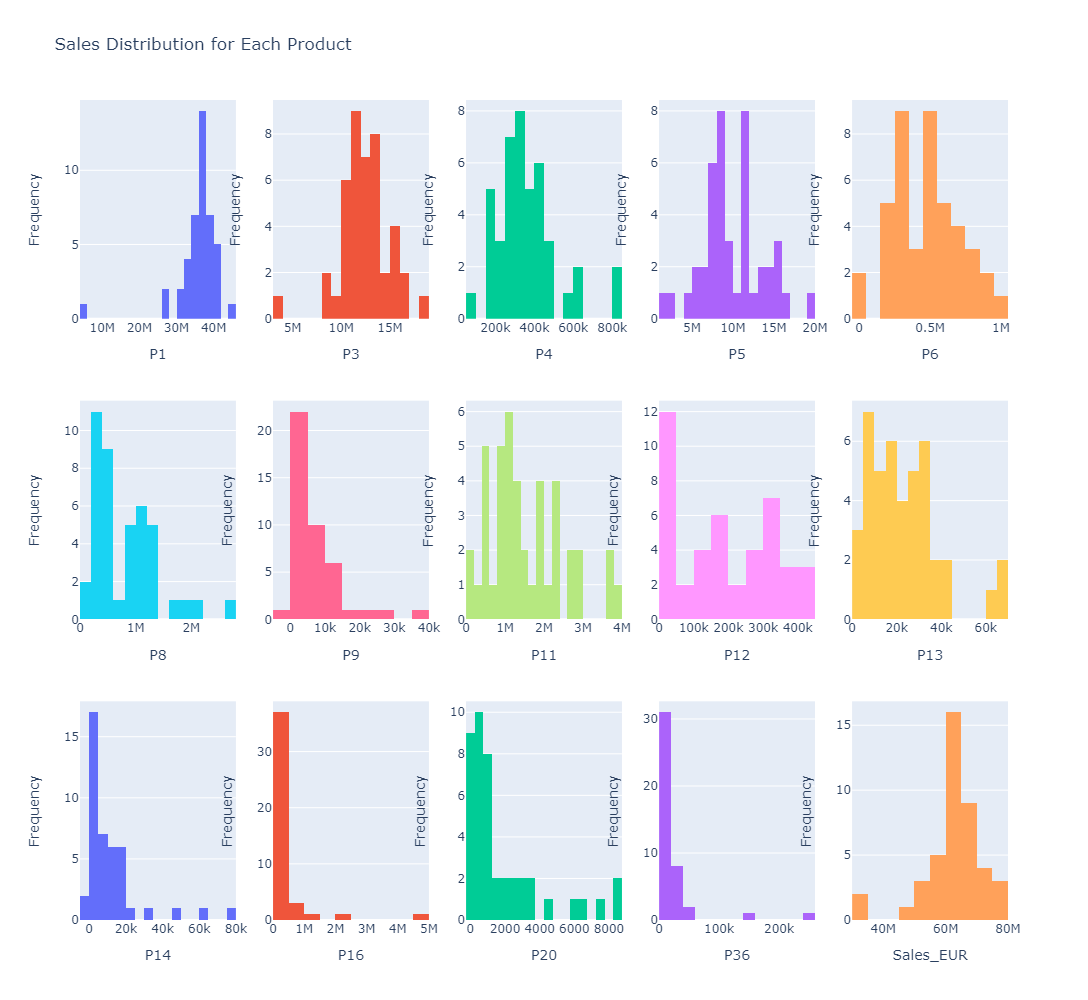

In [82]:
# grid
num_rows = 3  
num_cols = 5  
num_plots = num_rows * num_cols
fig = make_subplots(rows=num_rows, cols=num_cols)

# Loop for subplots
for i, product in enumerate(prod_list[:num_plots]):
    row = i // num_cols + 1
    col = i % num_cols + 1
    fig.add_trace(go.Histogram(x=sales_EDA[product], name=product, nbinsx=20),
                  row=row, col=col)
    # Add subtitles with variable names
    fig.update_xaxes(title_text=product, row=row, col=col)
    fig.update_yaxes(title_text="Frequency", row=row, col=col)

fig.update_layout(height=1000, width=1500, title_text="Sales Distribution for Each Product",
                  showlegend=False)
fig.show()


Above, we can observe some uncommon observations in sales that are not representative of the product sales and may represent outliers. Additionally, P1 and Sales_EUR (total) appear to have the most similar distribution, indicating the greater influence of P1 on the total dataset.

- Now, let's take a closer look at our data. We'll analyze sales over the years, breaking it down by product category and overall. This analysis will help us understand our sales trends better. By looking at how each product category performs and summarizing the total sales, we can get a clearer picture of what's happening with our sales data.

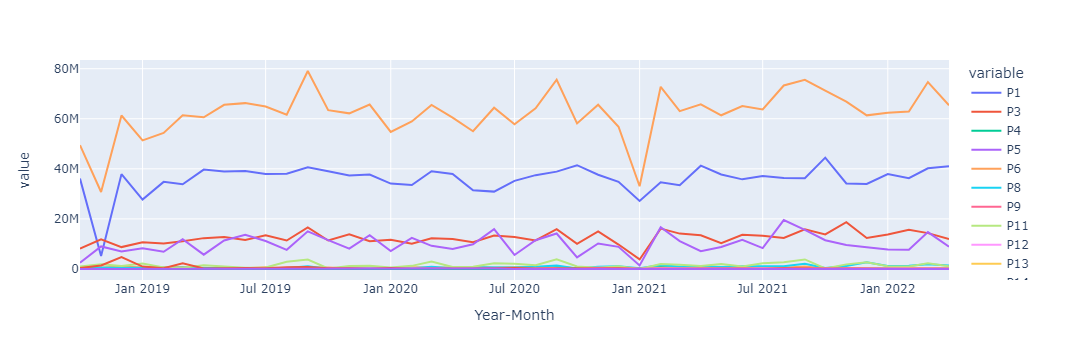

In [83]:
prod_list = ['P1', 'P3', 'P4', 'P5', 'P6', 'P8', 'P9', 'P11', 'P12', 'P13', 'P14', 'P16', 'P20', 'P36', 'Sales_EUR']

fig = px.line(sales_EDA, x=sales_EDA.index, y=prod_list)
fig.show()

- We can observe some peaks/anomalies in this graph, particularly in November 2018, where contrary to the rest of the observations, Product 1 is surpassed by Products 3 and 5. Total sales follow this negative peak, suggesting a strong contribution of Product 1. Another negative anomaly occurs in January 2021 for total sales. Such observations should be investigated and addressed during the Data Preparation phase.

- Here, we can see that Product 1 is the most significant considering the total sales in this dataset. As its sales, along with total sales (Sales_EUR), have much higher values compared to the others, we end up unable to accurately gauge the seasonality of the remaining products. For this reason, we will create independent visualizations:

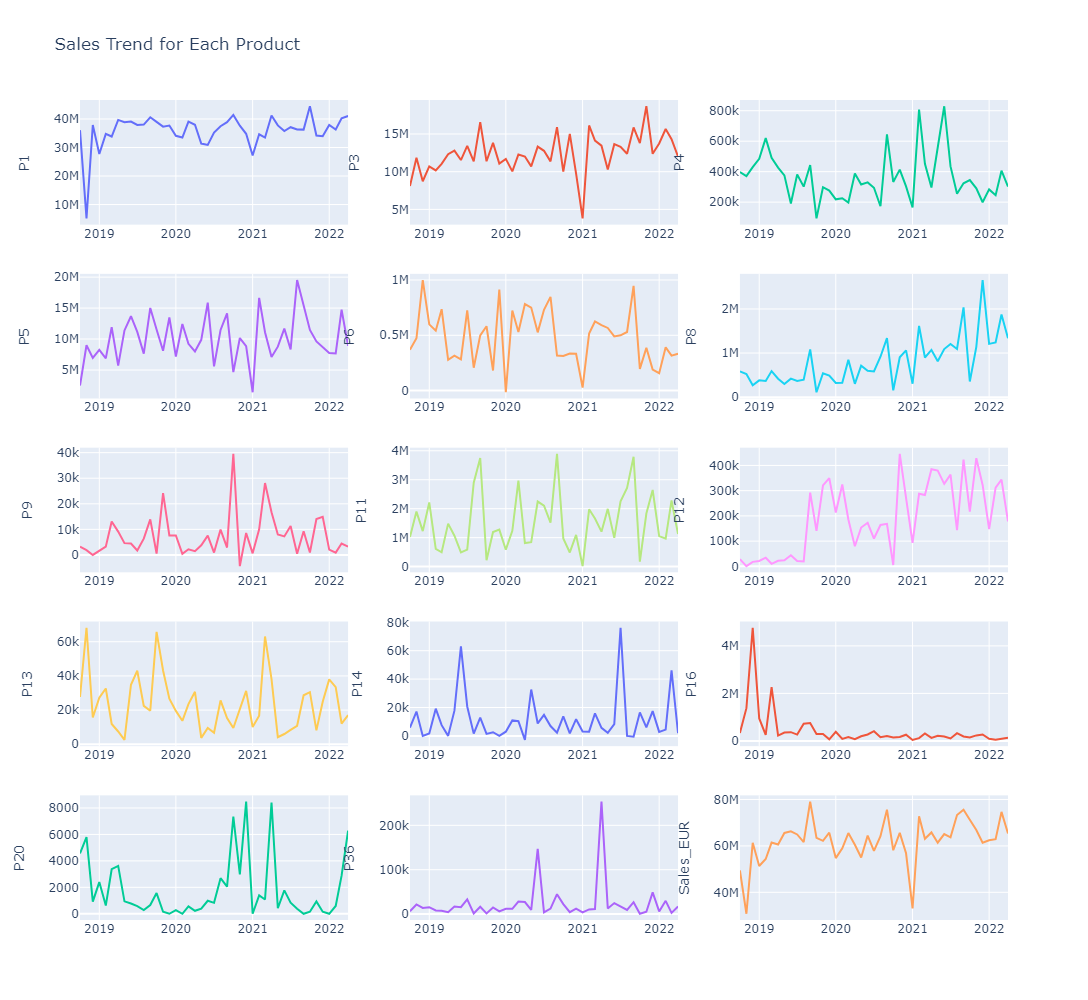

In [84]:
# Lets create a grid to be easier to compare
num_rows = 5  
num_cols = 3  
num_plots = num_rows * num_cols
fig = make_subplots(rows=num_rows, cols=num_cols)

# Loop for subplots
for i, product in enumerate(prod_list[:num_plots]):
    row = i // num_cols + 1
    col = i % num_cols + 1
    # Add trace with product data
    fig.add_trace(go.Scatter(x=sales_EDA.index, y=sales_EDA[product], mode='lines', name=product),
                  row=row, col=col)
    # Add subtitle with variable name
    fig.update_yaxes(title_text=product, row=row, col=col)

fig.update_layout(height=1000, width=1450, title_text="Sales Trend for Each Product",
                  showlegend=False)
fig.show()

- 'P1': As previously mentioned, it exhibits a significant negative anomaly in Nov 2018.
- 'P3': Shows a negative anomaly in Jan 2021.
- 'P4': Demonstrates a slight pattern between Oct 2019 and Aug 2020.
- 'P5': Exhibits a negative anomaly in Jan 2021. Considering the negative anomaly shared with P3 in Jan 2021, these factors may contribute to the negative anomaly in Total sales in Jan 2021.
- 'P6': While displaying strong numbers overall, it also shows significant negative anomalies, with months featuring negative sales (-15202.96), such as Jan 2020.
- 'P8': Indicates a growth trend, although October generally tends to be a less positive sales month.
- 'P9': Features months with negative sales.
- 'P11': Displays a wide range of values, with peaks in September suggesting a seasonal pattern that could be further explored with additional product information.
- 'P12': Until Aug 2019, suggests a possible launch.
- 'P14': Shows positive anomalies in Jun 2029 and Jul 2021; also has months with negative sales.
- 'P16': Initially had good numbers until the beginning of 2019 but declined after April 2019.
- 'P20': Exhibits inconsistency, has minimal representation.
- 'P36': Features positive anomalies in Jun 2020 and Apr 2021.
- 'Sales_EUR': As previously mentioned, displays anomalies, with September being the most positive month.

`With the exception of a few specific cases, such as Product P11 where we can observe some seasonality (peaking in September with the steepest declines between October and January), the distributions are somewhat complex and irregular.`

#### `Analysis of the percentage change in sales for each product compared to the previous month:`

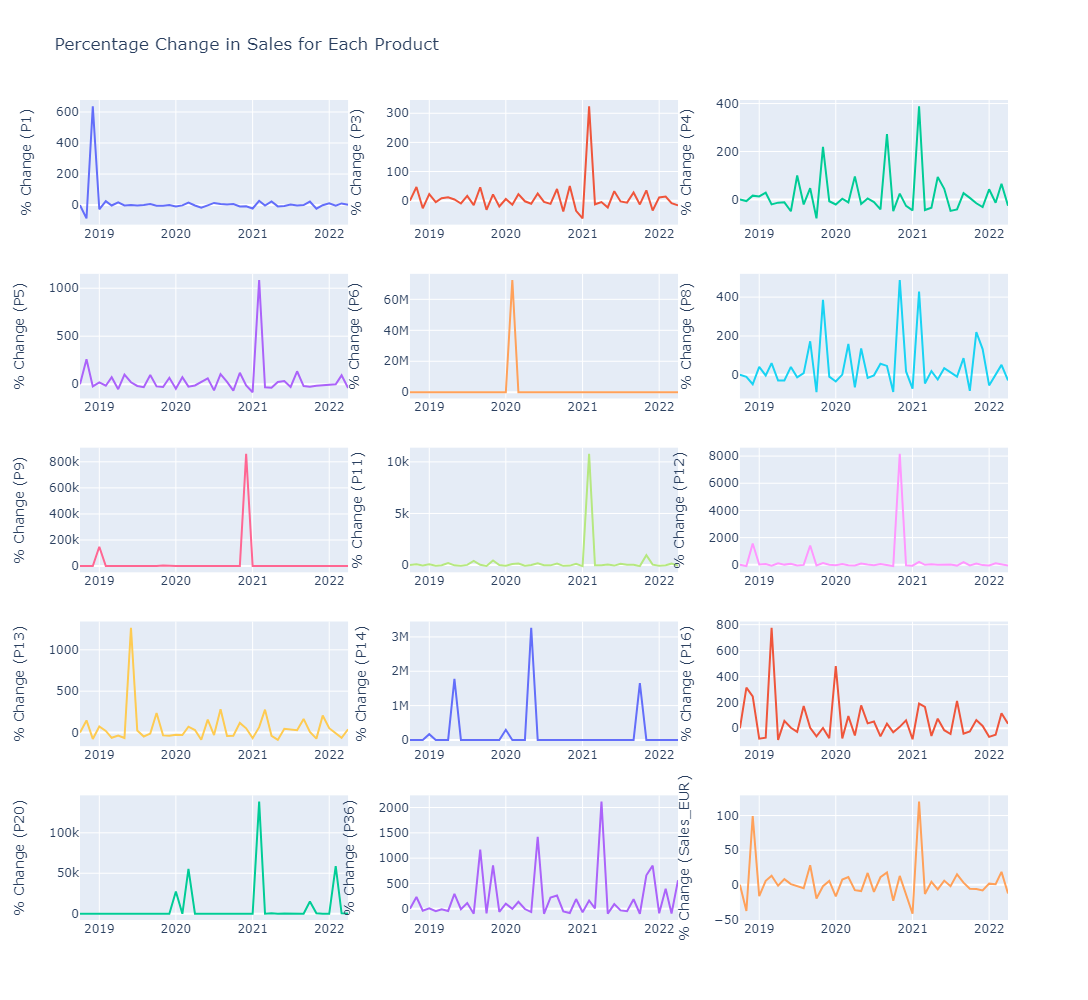

In [85]:
# Creating a grid
num_rows = 5  
num_cols = 3  
num_plots = num_rows * num_cols
fig = make_subplots(rows=num_rows, cols=num_cols)

# Loop for subplots
for i, product in enumerate(prod_list[:num_plots]):
    row = i // num_cols + 1
    col = i % num_cols + 1
    # Replace negative sales values with 1
    sales_no_negatives = sales_EDA[product].where(sales_EDA[product] > 0, 1)
    # Calculate percentage change, considering the sign of sales from the previous month
    previous_month_sales = sales_no_negatives.shift(1)  # Sales from the previous month
    percentage_change = ((sales_no_negatives - previous_month_sales) / previous_month_sales) * 100
    percentage_change = percentage_change.replace([np.inf, -np.inf], np.nan).fillna(0)  # Replace infinite values with NaN and fill NaNs with 0
    fig.add_trace(go.Scatter(x=sales_EDA.index, y=percentage_change, mode='lines', name=product),
                  row=row, col=col)
    fig.update_yaxes(title_text=f"% Change ({product})", row=row, col=col)

fig.update_layout(height=1000, width=1450, title_text="Percentage Change in Sales for Each Product",
                  showlegend=False)
fig.show()

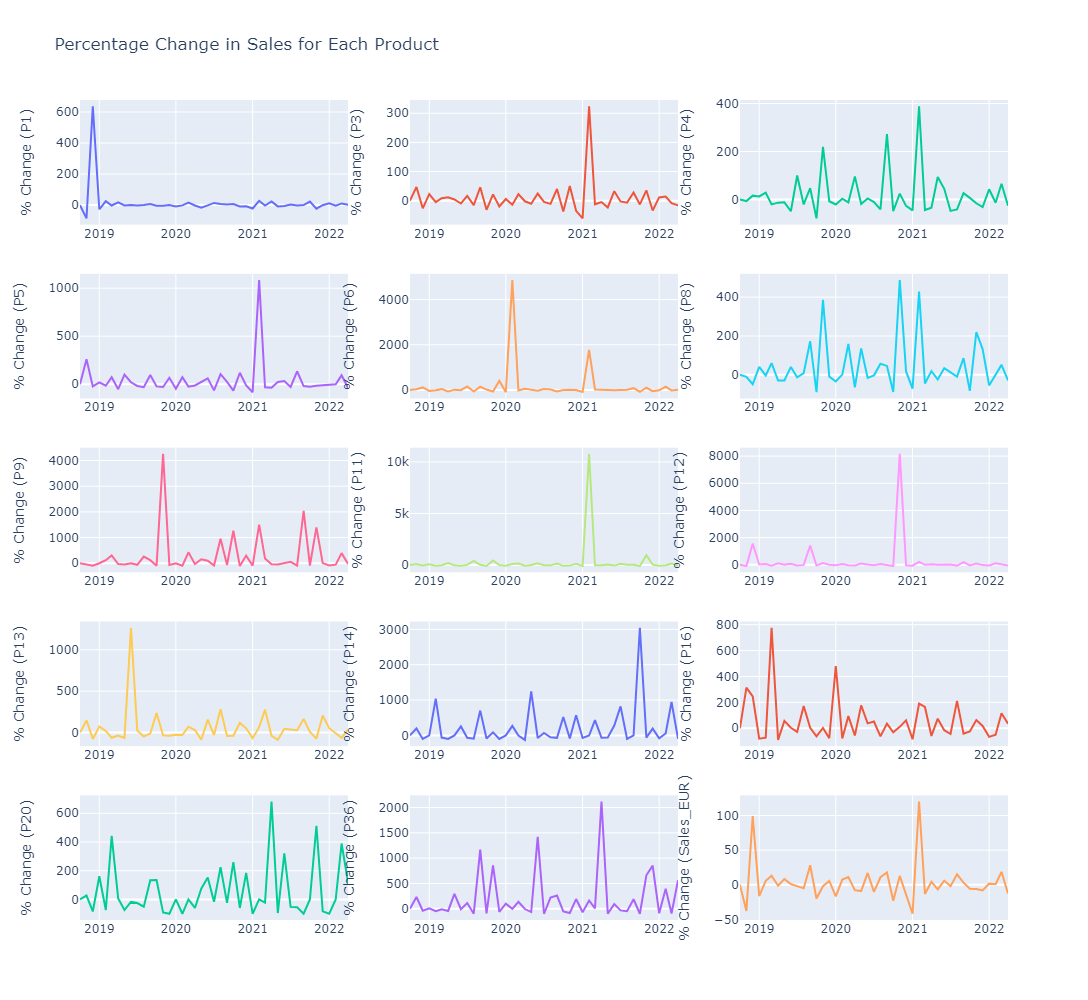

In [86]:
# Creating a grid
num_rows = 5  
num_cols = 3  
num_plots = num_rows * num_cols
fig = make_subplots(rows=num_rows, cols=num_cols)

# Loop for subplots
for i, product in enumerate(prod_list[:num_plots]):
    row = i // num_cols + 1
    col = i % num_cols + 1
    # Calculate percentage change, considering the sign of sales from the previous month
    previous_month_sales = sales_EDA[product].shift(1)  # Sales from the previous month
    percentage_change = ((sales_EDA[product] - previous_month_sales) / abs(previous_month_sales)) * 100
    percentage_change = percentage_change.replace([np.inf, -np.inf], np.nan).fillna(0)  # Replace infinite values with NaN and fill NaNs with 0
    fig.add_trace(go.Scatter(x=sales_EDA.index, y=percentage_change, mode='lines', name=product),
                  row=row, col=col)
    fig.update_yaxes(title_text=f"% Change ({product})", row=row, col=col)

fig.update_layout(height=1000, width=1450, title_text="Percentage Change in Sales for Each Product",
                  showlegend=False)
fig.show()

When analyzing the variation compared to the previous month, we can better understand the significant fluctuations mentioned earlier. These variations can also mask some observations. For example, the 600% variation we see in P1 in December 2018 is not due to significantly higher sales in that month, as they align with the rest of the observations. Instead, it's because the sales of P1 in November 2018 were much lower compared to the rest of the observations. The same applies to P3 in February 2021, and to P5 in February 2021 (in fact, these two products have similar variations), and so on.

It is also worth noting that some of the variations had gaps because some of the sales go to 0. To address this in this visualization, we replaced the 0 with 1 only to allow continuity. We made sure to use the absolute number of sales for the variation calculation because of negative sales. Otherwise, the formula might incorrectly indicate a negative variation for months with positive sales. 

In [87]:
# Calculate the percentage change for each product compared to the same month of the previous year

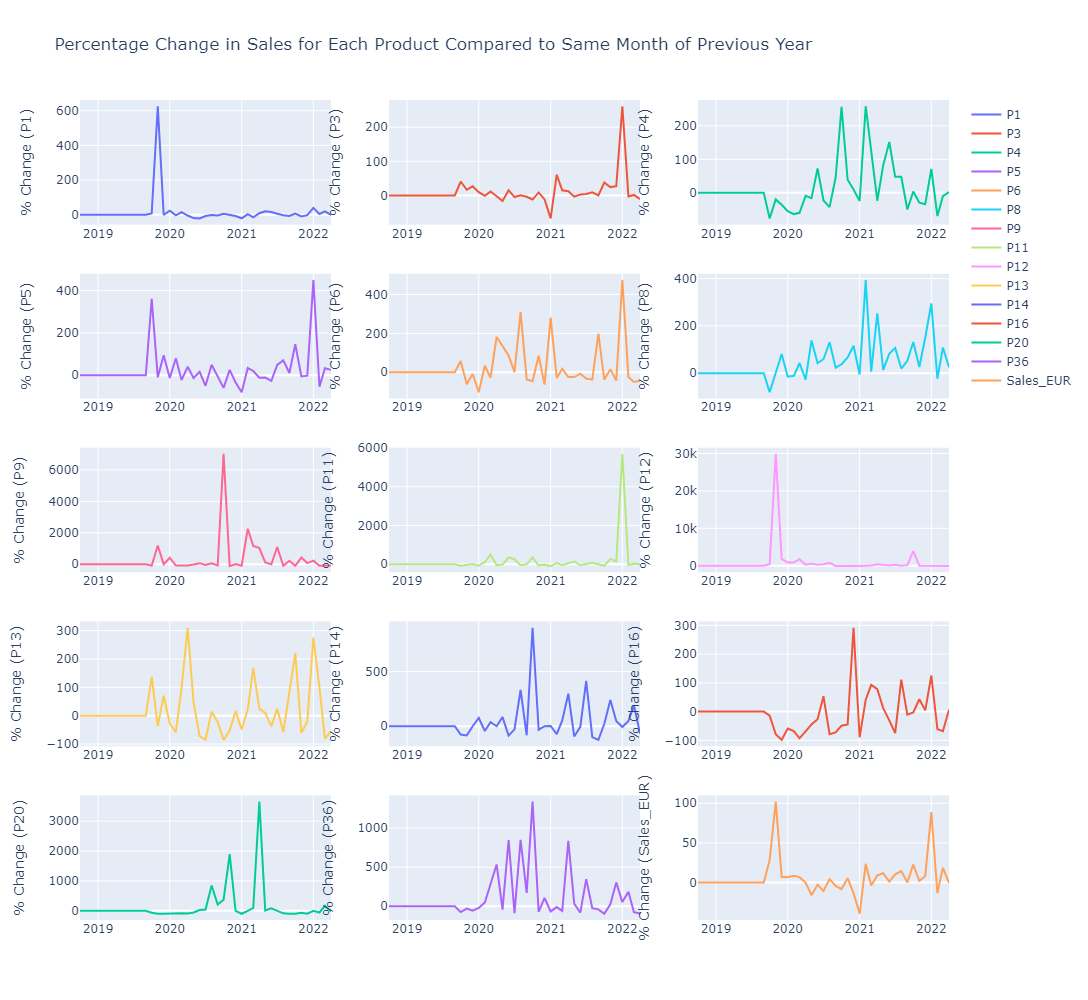

In [88]:
# Calculate percentage change, considering the sign of sales from the present month and the same month of the previous year
percentage_change_df = ((sales_EDA[prod_list] - sales_EDA[prod_list].shift(12)) / abs(sales_EDA[prod_list].shift(12))) * 100

# Replace infinite values with NaN and fill NaNs with 0
percentage_change_df = percentage_change_df.replace([np.inf, -np.inf], np.nan).fillna(0)

# Grid
num_rows = 5  
num_cols = 3  
num_plots = num_rows * num_cols
fig = make_subplots(rows=num_rows, cols=num_cols)

# Loop for subplots
for i, product in enumerate(prod_list[:num_plots]):
    row = i // num_cols + 1
    col = i % num_cols + 1
    # Add trace with product data
    fig.add_trace(go.Scatter(x=sales_EDA.index, y=percentage_change_df[product], mode='lines', name=product),
                  row=row, col=col)
    # Add subtitle with variable name
    fig.update_yaxes(title_text=f"% Change ({product})", row=row, col=col)

fig.update_layout(height=1000, width=1450, title_text="Percentage Change in Sales for Each Product Compared to Same Month of Previous Year")
fig.show()

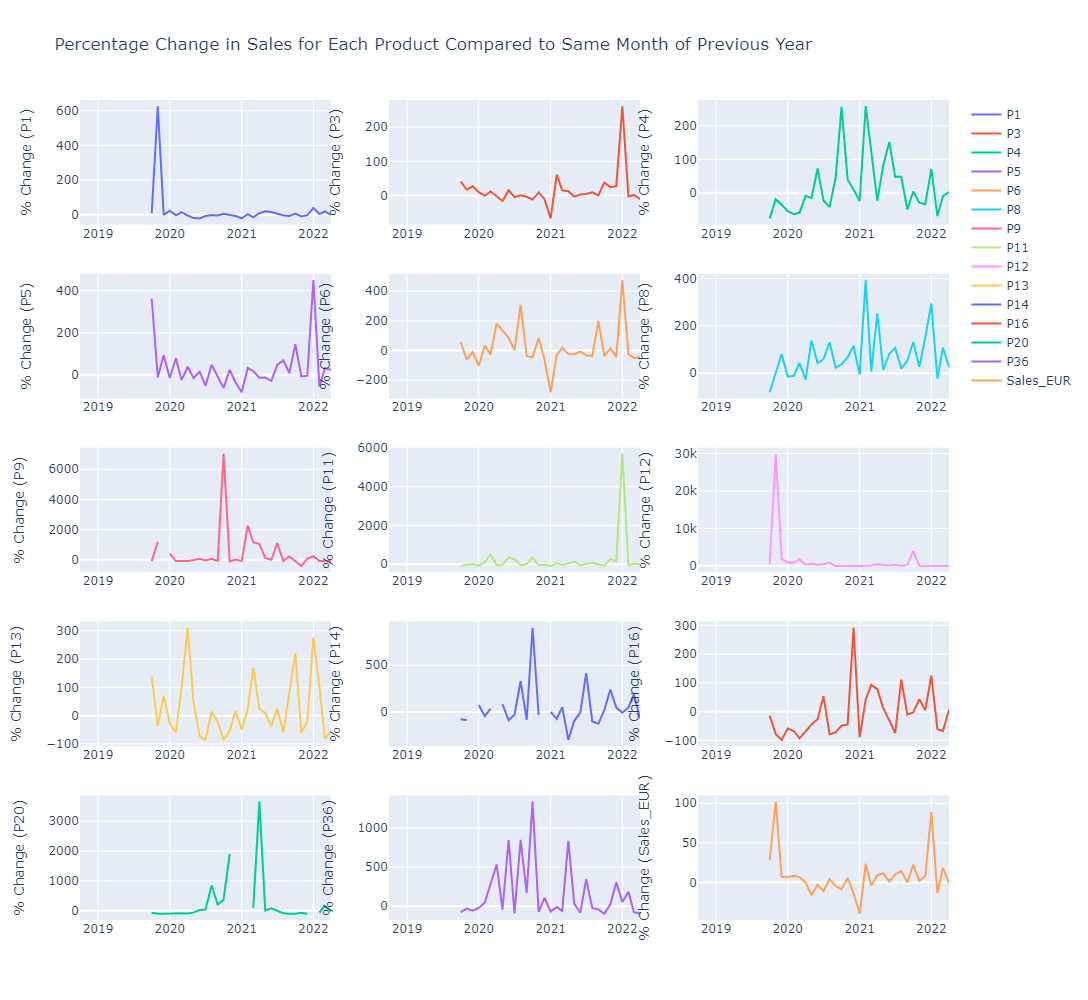

In [89]:
percentage_change_df = sales_EDA[prod_list].pct_change(periods=12) * 100

# grid
num_rows = 5  
num_cols = 3  
num_plots = num_rows * num_cols
fig = make_subplots(rows=num_rows, cols=num_cols)

# Loop for subplots
for i, product in enumerate(prod_list[:num_plots]):
    row = i // num_cols + 1
    col = i % num_cols + 1
    # Add trace with product data
    fig.add_trace(go.Scatter(x=sales_EDA.index, y=percentage_change_df[product], mode='lines', name=product),
                  row=row, col=col)
    # Add subtitle with variable name
    fig.update_yaxes(title_text=f"% Change ({product})", row=row, col=col)

fig.update_layout(height=1000, width=1450, title_text="Percentage Change in Sales for Each Product Compared to Same Month of Previous Year")
fig.show()

In [205]:
percentage_change_df.replace([np.inf, -np.inf], np.nan,inplace = True)

In [206]:
percentage_change_df.isna().sum()

P1           12
P3           12
P4           12
P5           12
P6           12
P8           12
P9           13
P11          12
P12          12
P13          12
P14          14
P16          12
P20          14
P36          12
Sales_EUR    12
dtype: int64

In [207]:
percentage_change_df

P1          P3          P4          P5          P6  \
Year-Month                                                               
2018-10            NaN         NaN         NaN         NaN         NaN   
2018-11            NaN         NaN         NaN         NaN         NaN   
2018-12            NaN         NaN         NaN         NaN         NaN   
2019-01            NaN         NaN         NaN         NaN         NaN   
2019-02            NaN         NaN         NaN         NaN         NaN   
2019-03            NaN         NaN         NaN         NaN         NaN   
2019-04            NaN         NaN         NaN         NaN         NaN   
2019-05            NaN         NaN         NaN         NaN         NaN   
2019-06            NaN         NaN         NaN         NaN         NaN   
2019-07            NaN         NaN         NaN         NaN         NaN   
2019-08            NaN         NaN         NaN         NaN         NaN   
2019-09            NaN         NaN         NaN         NaN         NaN   
2019-10       8.070548   40.711074  -76.562209  361.879346   57.561772   
2019-11     626.038622   16.547743  -19.743149   -9.892238  -61.703760   
2019-12      -0.496449   26.791597  -35.836425   94.237906   -8.613931   
2020-01      23.039775    9.290685  -54.846081  -12.739216 -102.538590   
2020-02      -3.699820   -1.240977  -63.669260   80.606968   33.643654   
2020-03      15.381334   11.240124  -59.793947  -22.511376  -27.976360   
2020-04      -4.300414   -2.511982   -8.981568   39.835117  181.741022   
2020-05     -19.275456  -16.331916  -16.020001  -13.321249  137.474087   
2020-06     -20.993680   15.376067   72.729118   16.021306   86.040163   
2020-07      -7.121232   -4.817659  -22.813240  -49.836787    0.658342   
2020-08      -1.473586    0.123992  -42.726007   49.935751  309.359726   
2020-09      -4.244587   -4.022909   45.496558   -5.716334  -36.505930   
2020-10       6.258425  -12.114147  256.770320  -59.738835  -46.106353   
2020-11       0.856578    8.647129   38.772460   25.426585   84.992393   
2020-12      -7.651020  -11.934599    9.885721  -34.450213  -63.590464   
2021-01     -20.330889  -67.484159  -24.406121  -80.439517 -280.707836   
2021-02       3.356556   60.692393  258.586130   34.018092  -28.817570   
2021-03     -14.305321   15.039165  128.640822   20.254753   17.985955   
2021-04       8.624893   12.101907  -23.710126  -11.329778  -24.239592   
2021-05      20.254012   -3.833849   81.847008  -11.191077  -24.502569   
2021-06      15.874116    2.466259  151.780321  -26.374534   -6.869398   
2021-07       5.444832    4.017621   47.699212   48.852057  -31.615028   
2021-08      -3.124875    8.900095   47.675306   70.317009  -37.465480   
2021-09      -6.688571   -0.238620  -49.867939   10.374932  199.090573   
2021-10       7.307304   37.917363    3.722714  146.867261  -37.339296   
2021-11      -9.181414   24.399516  -29.754286   -5.494436   15.317073   
2021-12      -2.489848   26.865552  -34.315245   -2.139590  -42.844393   
2022-01      39.596533  261.544041   71.620818  450.162517  473.911311   
2022-02       4.800833   -2.918279  -69.631265  -53.903806  -24.155460   
2022-03      20.146494    1.357193  -10.079663   32.759103  -49.426949   
2022-04      -0.494929  -10.860024    2.060462   25.391708  -43.676377   

                    P8           P9          P11           P12         P13  \
Year-Month                                                                   
2018-10            NaN          NaN          NaN           NaN         NaN   
2018-11            NaN          NaN          NaN           NaN         NaN   
2018-12            NaN          NaN          NaN           NaN         NaN   
2019-01            NaN          NaN          NaN           NaN         NaN   
2019-02            NaN          NaN          NaN           NaN         NaN   
2019-03            NaN          NaN          NaN           NaN         NaN   
2019-04            NaN          NaN          NaN           NaN   

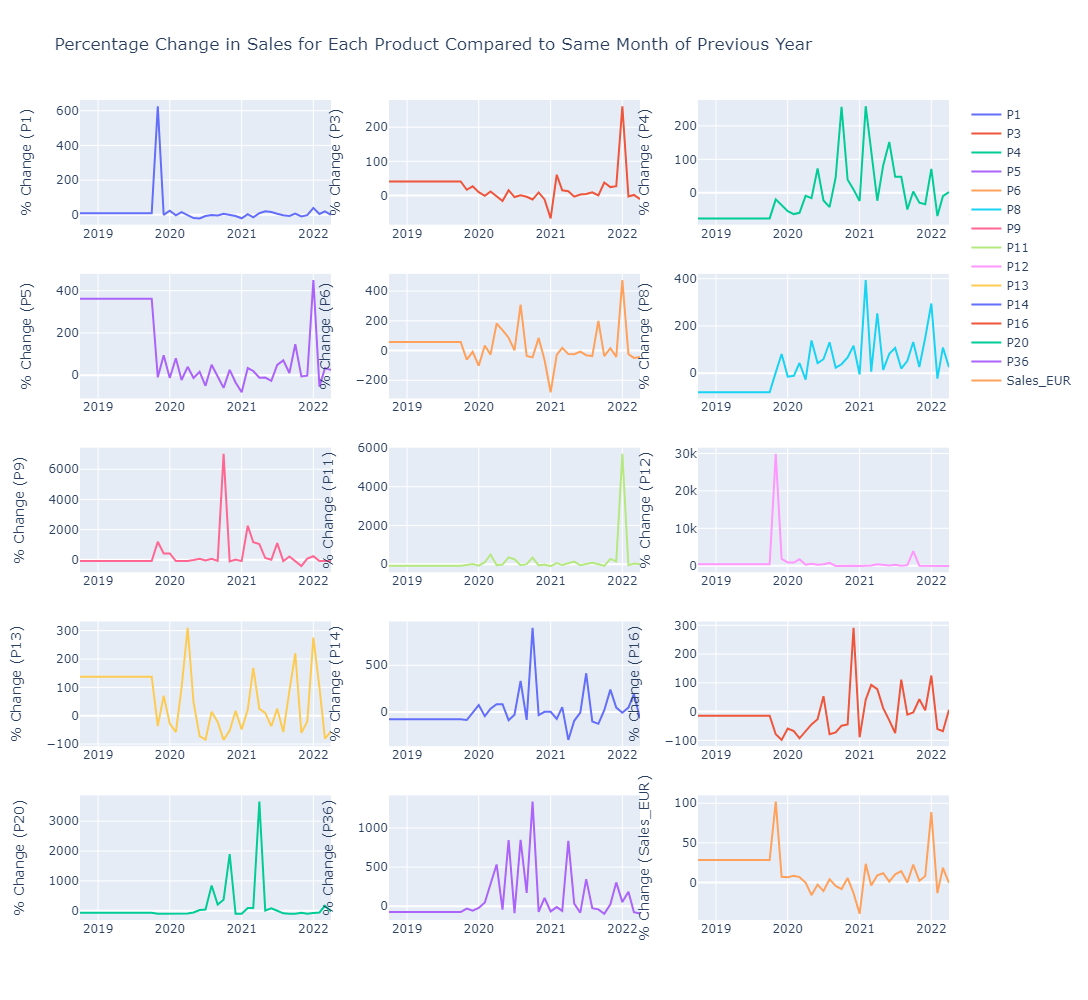

In [214]:
# Impute NaN values with forward fill
forward_filled_df = percentage_change_df.fillna(method='bfill')

# grid
num_rows = 5  
num_cols = 3  
num_plots = num_rows * num_cols
fig = make_subplots(rows=num_rows, cols=num_cols)

# Loop for subplots
for i, product in enumerate(forward_filled_df.columns[:num_plots]):
    row = i // num_cols + 1
    col = i % num_cols + 1
    # Add trace with product data
    fig.add_trace(go.Scatter(x=forward_filled_df.index, y=forward_filled_df[product], mode='lines', name=product),
                  row=row, col=col)
    # Add subtitle with variable name
    fig.update_yaxes(title_text=f"% Change ({product})", row=row, col=col)

fig.update_layout(height=1000, width=1450, title_text="Percentage Change in Sales for Each Product Compared to Same Month of Previous Year")
fig.show()


In [ ]:
#com a mediana alguns dao

<a id = "SalesBoxPlots"></a>

#### Sales Dataframe: Box Plots (Outliers)

[Back to Univariate EDA: Data Visualization](#Univariate-DVizualization)

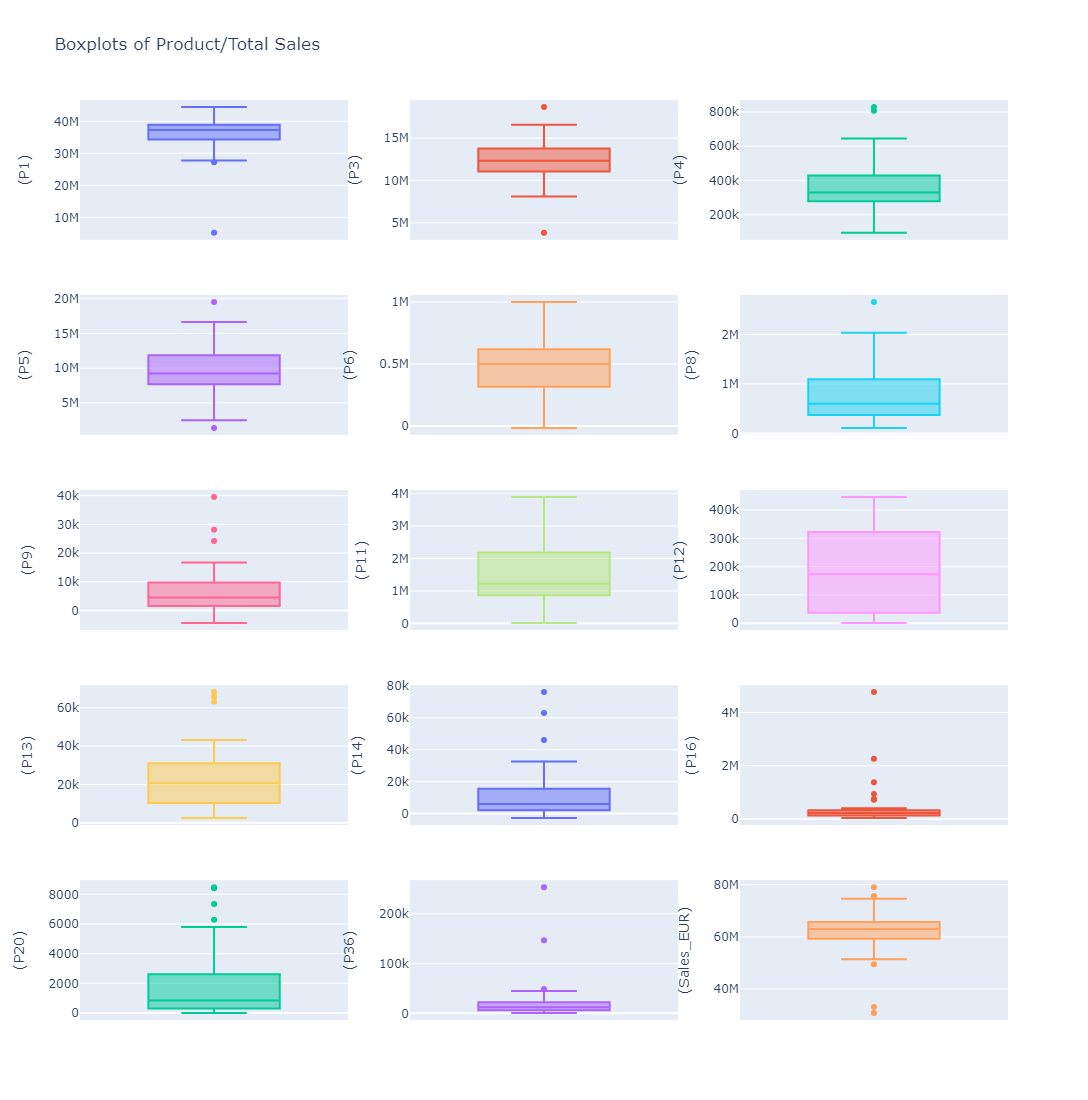

In [90]:
# Grid with all products
num_rows = 5 
num_cols = 3  
num_plots = num_rows * num_cols
fig = make_subplots(rows=num_rows, cols=num_cols)

# Loop para os subplots (Boxplots)
for i, product in enumerate(prod_list[:num_plots]):
    row = i // num_cols + 1
    col = i % num_cols + 1
    fig.add_trace(go.Box(y=sales_EDA[product], name=''), row=row, col=col)
    fig.update_yaxes(title_text=f"({product})", row=row, col=col)
fig.update_layout(title='Boxplots of Product/Total Sales',
                  height=1100, width=1400,
                  showlegend=False)
fig.show()

<span style="background-color: red; padding: 5px;">Data preparation Notes:</span>
- 'P1': Outliers below the Lowe fence (<27.73M)
- 'P3': Outliers below the Lowe fence (<8.09M) and above the upper fence (>16.58M) - 2 points 
- 'P4': Outliers above the upper fence (>645.058K) - 2 points
- 'P5': Outliers below the Lowe fence (<2.50M) and above the upper fence (>16.65M) - 2 points
- 'P6': no visible problems, but negative values of 15k need to be resolved 
- 'P8': Outliers above the upper fence (>2.04M) - 1 point
- 'P9': Outliers above the upper fence (>16.71K) - 3 points 
- 'P11': Ok 
- 'P12': Ok
- 'P13': Outliers above the upper fence (>43.19K) - 3 points 
- 'P14': Outliers above the upper fence (>32.67K) - 3 points 
- 'P16': Outliers above the upper fence (>409.17K) - 3 points 
- 'P20': Outliers above the upper fence (>5 798) - 3 points - the scale is much lower
- 'P36': Outliers above the upper fence (>44.867K) - 3 points
- 'Sales_EUR': Outliers below the Lowe fence (<51.36M) and above the upper fence (>74.67M) - 5 

`We will assign the minimum and maximum acceptable values (lower fence and upper fence) of each product to the outliers.`

<a id = "BivariateVizualization"></a>

### 1.2.5. Bivariate EDA: Data Visualization

- [Sales Dataframe: Composition Table & Correlations](#SD:R&Correlations)

[Back to Index](#Index)

<a id = "SD:R&Correlations"></a>

#### Sales Dataframe: Composition Table & Correlations

[Back to Bivariate EDA: Data Visualization](#BivariateVizualization)

In [91]:
# Calculating the % of each product per year
total_sales_by_year = sales_EDA.groupby('YEAR')['Sales_EUR'].sum()
new_df = pd.DataFrame(index=total_sales_by_year.index, columns=prod_list)

for year in total_sales_by_year.index:
    sales_for_year = sales_EDA[sales_EDA['YEAR'] == year][prod_list].sum()
    percentages_for_year = (sales_for_year / total_sales_by_year[year]) * 100
    new_df.loc[year] = percentages_for_year.round(decimals=0).astype(int).astype(str) + "%" 

new_df

P1   P3  P4   P5  P6  P8  P9 P11 P12 P13 P14 P16 P20 P36 Sales_EUR
YEAR                                                                     
2018  56%  20%  1%  13%  1%  1%  0%  3%  0%  0%  0%  5%  0%  0%      100%
2019  59%  19%  1%  16%  1%  1%  0%  2%  0%  0%  0%  1%  0%  0%      100%
2020  59%  20%  1%  16%  1%  1%  0%  3%  0%  0%  0%  0%  0%  0%      100%
2021  56%  20%  1%  17%  1%  2%  0%  3%  0%  0%  0%  0%  0%  0%      100%
2022  59%  21%  0%  15%  0%  2%  0%  2%  0%  0%  0%  0%  0%  0%      100%

- P1, P3, and P5 collectively represent between 89% and 95% of the total sales in the dataset over the years, with P1 alone accounting for more than half of this total.

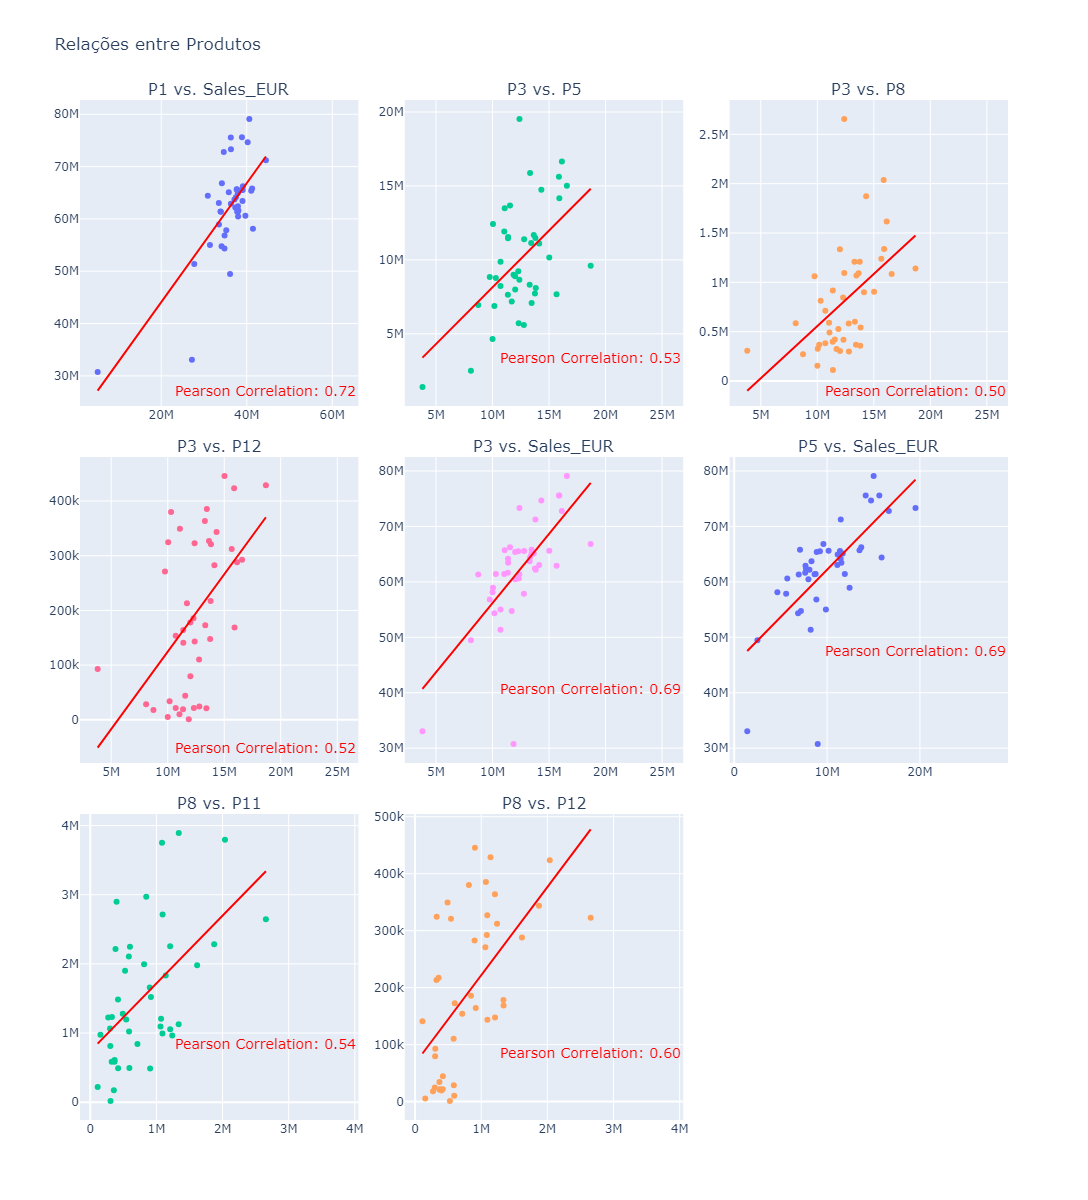

In [92]:
# Now, we're going to analyze correlations between products. We define a threshold of 0.5 for the Pearson correlation 
# to visualize only the significant relationships. We need to do this to make it easier to spot correlations, 
# since the large number of possible correlations makes plotting more challenging.

threshold = 0.5
significant_correlations = []

for i, prod1 in enumerate(prod_list):
    for j, prod2 in enumerate(prod_list):
        if j > i:         # j > i to avoid repeated correlations when doing the calculation of the Pearson correlation
            # Calcula a correlação de Pearson
            pearson_corr = sales_EDA[prod1].corr(sales_EDA[prod2])
            if abs(pearson_corr) >= threshold:
                significant_correlations.append((prod1, prod2, pearson_corr))

# subplots layout
num_subplots = len(significant_correlations)
num_rows = int(np.ceil(num_subplots / 3))
num_cols = min(3, num_subplots)

#scatter plot and 
fig = make_subplots(rows=num_rows, cols=num_cols, 
                    subplot_titles=[f"{prod1} vs. {prod2}" for prod1, prod2, _ in significant_correlations],
                    horizontal_spacing=0.05, vertical_spacing=0.05)

for i, (prod1, prod2, pearson_corr) in enumerate(significant_correlations, start=1):
    m, b = np.polyfit(sales_EDA[prod1], sales_EDA[prod2], 1)
    x = np.array([sales_EDA[prod1].min(), sales_EDA[prod1].max()])
    y = m * x + b
    fig.add_trace(go.Scatter(x=sales_EDA[prod1], y=sales_EDA[prod2], mode='markers', name='Data'), row=(i-1) // num_cols + 1, col=(i-1) % num_cols + 1)
    fig.add_trace(go.Scatter(x=x, y=y, mode='lines', name='Linear Regression', line=dict(color='red', width=2)),
                  row=(i-1) // num_cols + 1, col=(i-1) % num_cols + 1)
    fig.add_annotation(x=x.max(), y=y.min(), 
                       text=f"Pearson Correlation: {pearson_corr:.2f}", 
                       showarrow=False, font=dict(color="red", size=14),
                       row=(i-1) // num_cols + 1, col=(i-1) % num_cols + 1)

fig.update_layout(height=400*num_rows, width=500*num_cols, title_text="Relações entre Produtos", showlegend=False)
fig.show()


It's worth noting that Sales_EUR represents the `total sales in this dataset`. As expected, a correlation coefficient of 0.72 indicates a strong positive correlation between P1 and Sales_EUR. Additionally, P3 and P5 show a good correlation with Sales_EUR, which makes sense given that they are the most significant products in terms of sales, contributing the most to Sales_EUR.

Regarding the `relationships between products`, we observe moderate positive correlations between P8 and P12, P8 and P11, P3 and P5, P3 and P12, and P3 and P8. These relationships could indicate that these products may be moderately affected by the same changes in the market or external factors, such as shifts in customer preferences or market dynamics.

<a id = "multivariate"></a>

### 1.2.6. Multvariate EDA: Duplicates

[Back to Index](#Index)

In [93]:
for name, df in dfs.items():
    duplicated_rows = df[df.duplicated()]
    num_duplicates = duplicated_rows.shape[0]

    print(f"Duplicatas no DataFrame {name}: {num_duplicates}")

Duplicatas no DataFrame sales_df: 0
Duplicatas no DataFrame Market_df: 0
Duplicatas no DataFrame interest_rates: 0
Duplicatas no DataFrame cpi_df: 0
Duplicatas no DataFrame exchange_rates: 0
Duplicatas no DataFrame effective_exchange_rates: 0
Duplicatas no DataFrame GDP_df: 0
Duplicatas no DataFrame Unemployment_rates: 3
Duplicatas no DataFrame cci_df: 0
Duplicatas no DataFrame bci_df: 0
Duplicatas no DataFrame business_tend_manu: 0
Duplicatas no DataFrame business_tend_const: 10
Duplicatas no DataFrame conflict_data: 0
Duplicatas no DataFrame siemens_stocks: 0


In [94]:
Unemployment_rates[Unemployment_rates.duplicated(subset=['FRA_Unemployment_Rate', 'DEU_Unemployment_Rate', 'GBR_Unemployment_Rate', 'USA_Unemployment_Rate'], keep=False)]

FRA_Unemployment_Rate  DEU_Unemployment_Rate  \
Year-Month                                                 
2018-01                       9.2                    3.3   
2018-04                       9.2                    3.3   
2018-10                       8.8                    3.1   
2018-11                       8.8                    3.1   
2019-02                       8.7                    3.0   
2019-03                       8.7                    3.0   

            GBR_Unemployment_Rate  USA_Unemployment_Rate  
Year-Month                                                
2018-01                       4.2                    4.0  
2018-04                       4.2                    4.0  
2018-10                       4.0                    3.8  
2018-11                       4.0                    3.8  
2019-02                       3.8                    3.8  
2019-03                       3.8                    3.8

`Explanation: DataFrame Index and Duplicates`

The index of a DataFrame is set to a date column and it's the only column that can have duplicates. In pandas, when a column is set as the index, it must be unique. This means that there can't be two rows with the same index value (e.g., the same date). Therefore, we dont have duplicate data, we have the same information for different dates but thats possible.

### <div class="alert-info">Quality Assessment & Data Preparation Steps</div>

- `Data Types Correction`
- `Missing values`
- `Outliers`
- `Feature Engineering`
- `Variable pre-selection`
- `Merging Datasets`: 

<a id = "DataPreparation"></a>
    
## 2. Data Preparation

 - [Variable pre-selection](#Variable-selection)

 - [Data Formatting and Range Adjustment](#datacorrection)

 - [Data Types Correction](#DataTypes)
 
 - [Missing values](#Missing-values)
     
 - [Outliers](#Outliers)
     
 - [Feature Engineering](#Features)
     
 
 - [Merging Datasets](#MergingData)
 

[Back to Index](#Index)


<a id = 'Variable-selection'></a>

### Variable pre-selection 

[Back to Data Preparation](#DataPreparation)

In [95]:
# Removing YEAR and MONTH from Sales
sales_df.drop(columns=['YEAR', 'MONTH'], inplace=True)

In [96]:
# Removing'United States: EUR in LCU'
Market_df.drop(columns=['United States: EUR in LCU'], inplace=True)

<a id = 'datacorrection'></a>

### Data Formatting and Range Adjustment

[Back to Data Preparation](#DataPreparation)

We have already performed some preprocessing while loading the data. Now, we will standardize the format of each index across all dataframes and ensure that they have the same range.

#### `Important macro-economic indices for Siemens in its most important countries: 'Market data.xlsx'`

In [97]:
# Transforming yyyy'm'm into 'YYYY-MM'
new_index = []
for index_val in Market_df.index:
    year = index_val.split('m')[0].strip() 
    month = index_val.split('m')[1].strip()  
    if len(month) == 1:
        month = '0' + month
    new_val = f"{year}-{month}"
    new_index.append(new_val)
Market_df.index = new_index

Market_df = Market_df.loc[start_date:end_date]
market_final = Market_df.copy()
market_final.head(1)

CHN_M&E_Prod  CHN_M&E_Ship  FRA_M&E_Prod  FRA_M&E_Ship  DEU_M&E_Prod  \
2017-10           204           204           108           117           111   

         DEU_M&E_Ship  ITA_M&E_Prod  ITA_M&E_Ship  JPN_M&E_Prod  JPN_M&E_Ship  \
2017-10           121           112           116           117           116   

         CHE_M&E_Prod  CHE_M&E_Ship  GBR_M&E_Prod  GBR_M&E_Ship  USA_M&E_Prod  \
2017-10         106.0          99.0           109         111.0           108   

         USA_M&E_Ship  EU_M&E_Prod  EU_M&E_Ship  WLD_P_Metals  WLD_P_Energy  \
2017-10         118.0          115          120         92.95         73.28   

         WLD_P_Minerals  WLD_P_Natural_Gas  WLD_P_Crude_Oil  WLD_P_Copper  \
2017-10           83.39              69.77            69.48         90.35   

         USA_Producer_Prices_Elect  GBR_Producer_Prices_Elect  \
2017-10                        106                      112.0   

         ITA_Producer_Prices_Elect  FRA_Producer_Prices_Elect  \
2017-10                        105                      101.0   

         DEU_Producer_Prices_Elect  CHN_Producer_Prices_Elect  \
2017-10                        107                       97.0   

         USA_Prod_Index_M&E  WLD_Prod_Index_M&E  CHE_Prod_Index_M&E  \
2017-10                 107                 122               103.0   

         GBR_Prod_Index_M&E  ITA_Prod_Index_M&E  JPN_Prod_Index_M&E  \
2017-10                 106                 122                 120   

         FRA_Prod_Index_M&E  DEU_Prod_Index_M&E  USA_Prod_Index_Elect  \
2017-10                 116                 113                   110   

         WLD_Prod_Index_Elect  CHE_Prod_Index_Elect  GBR_Prod_Index_Elect  \
2017-10                 123.0                 111.0                   115   

         ITA_Prod_Index_Elect  JPN_Prod_Index_Elect  FRA_Prod_Index_Elect  \
2017-10                    88                   110                    93   

         DEU_Prod_Index_Elect  
2017-10                   107

#### `Exchange Rates`

In [98]:
# Index from yyyy-mm-dd to yyyy-mm
exchange_rates.index = pd.to_datetime(exchange_rates.index)

# Formatando o índice para 'YYYY-MM'
exchange_rates.index = exchange_rates.index.strftime('%Y-%m')
exchange_rates = exchange_rates.loc[start_date:end_date]

er_final = exchange_rates.copy()
er_final.head(1)

CNY/EUR  GBP/EUR  HKD/EUR  INR/EUR  RUB/EUR  SEK/EUR  USD/EUR
Year-Month                                                               
2017-10      7.7177  0.89071   9.1763  76.4977  67.8647   9.6138   1.1756

#### `Nominal Effective Exchange Rates`

In [99]:
# Convert the index to 'yyyy-mm' format
effective_exchange_rates.index = pd.to_datetime(effective_exchange_rates.index, format='%Y/%m/%d').strftime('%Y-%m')
effective_exchange_rates = effective_exchange_rates.loc[start_date:end_date]

effective_exchange_rates.columns.name = None
effective_exchange_rates = effective_exchange_rates.rename_axis('Year-Month')

effective_er_final = effective_exchange_rates.copy()
effective_er_final.head(1)

ValueError: time data "0" doesn't match format "%Y/%m/%d", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

#### `Gross Domestic Product (GDP)`

In [ ]:
# we decided to not consider this dataset 

#### `Geopolitical Events and Conflict Data`

In [100]:
conflict_data = conflict_data.loc[start_date:end_date]
conflict_dt_final = conflict_data.copy()

# input the mean of 2018 since its onlu 3 month of low impact
mean_ukr_2018 = conflict_data['UKR_CONFLICT'].loc['2018-01':'2018-12'].mean()
mean_rus_2018 = conflict_data['RUS_CONFLICT'].loc['2018-01':'2018-12'].mean()

# Add 2017 lines beacause we only have data from 2018-01
conflict_dt_final.loc['2017-10'] = [mean_rus_2018, mean_ukr_2018]
conflict_dt_final.loc['2017-11'] = [mean_rus_2018, mean_ukr_2018]
conflict_dt_final.loc['2017-12'] = [mean_rus_2018, mean_ukr_2018]
conflict_dt_final = conflict_dt_final.sort_index()

conflict_dt_final.head(4)

RUS_CONFLICT  UKR_CONFLICT
Year-Month                            
2017-10            21.75        1113.5
2017-11            21.75        1113.5
2017-12            21.75        1113.5
2018-01            22.00         717.0

#### `Siemens Stock Performance`

In [101]:
siemens_stocks.index = pd.to_datetime(siemens_stocks.index, format='%m/%d/%Y')
siemens_stocks.index = siemens_stocks.index.strftime('%Y-%m')
siemens_stocks = siemens_stocks.sort_index()
siemens_stocks = siemens_stocks.loc[start_date:end_date]
siemens_stocks = siemens_stocks.loc[start_date:end_date]
siemens_stocks = siemens_stocks.rename_axis('Year-Month')
siemens_stocks_final = siemens_stocks.copy()
siemens_stocks_final.head(1)

SIESTOCK_%VAR
Year-Month              
2017-10            2.77%

- 'Market_df': 2 coisas a notar, a evidente suberania da china na produção de Machinery and Elitrical, e pricipalmente o crescente preço do Natural Gas o que pode agravar com o conflito na Russia-Ucrania uma vez que a russia é um dos maiores exportadores de Gas natural do mundo

- Evidente subida da interest rate da russia logo em inicios de 2022

- Subida de cpi (inflacao) priciplamente nos paises da europa

- effective nominal exchange rate consegue capturar o efeito na russia



<a id = 'DataTypes'></a>

### Data Types Correction 

[Back to Data Preparation](#DataPreparation)

In [102]:
# Defining data types for each column
data_types_sales = {
    'P1': 'float32',          # Monetary values can have 2 decimal places and occupy less space in float32 
    'P11': 'float32',
    'P6': 'float32',
    'P8': 'float32',
    'P12': 'float32',
    'P16': 'float32',
    'P4': 'float32',
    'P5': 'float32',
    'P3': 'float32',
    'P9': 'float32',
    'P14': 'float32',
    'P13': 'float32',
    'P20': 'float32',
    'P36': 'float32',
    'Sales_EUR': 'float32'   
}

sales_df = sales_df.astype(data_types_sales)

# sales_df.dtypes
# sales_df.info() (-3Kb de memória)

In [103]:
data_types_market = {
    'CHN_M&E_Prod': 'uint8', 
    'CHN_M&E_Ship': 'uint8',
    'FRA_M&E_Prod': 'uint8',
    'FRA_M&E_Ship': 'uint8',
    'DEU_M&E_Prod': 'uint8',
    'DEU_M&E_Ship': 'uint8',
    'ITA_M&E_Prod': 'uint8',
    'ITA_M&E_Ship': 'uint8',
    'JPN_M&E_Prod': 'uint8',
    'JPN_M&E_Ship': 'uint8',
    'CHE_M&E_Prod': 'float32',
    'CHE_M&E_Ship': 'float32',
    'GBR_M&E_Prod': 'uint8',
    'GBR_M&E_Ship': 'float32',
    'USA_M&E_Prod': 'uint8',
    'USA_M&E_Ship': 'float32',
    'EU_M&E_Prod': 'uint8',
    'EU_M&E_Ship': 'uint8',
    'WLD_P_Metals': 'float32',
    'WLD_P_Energy': 'float32',
    'WLD_P_Minerals': 'float32',
    'WLD_P_Natural_Gas': 'float32',
    'WLD_P_Crude_Oil': 'float32',
    'WLD_P_Copper': 'float32',
    'USA_Producer_Prices_Elect': 'uint8',
    'GBR_Producer_Prices_Elect': 'float32',
    'ITA_Producer_Prices_Elect': 'uint8',
    'FRA_Producer_Prices_Elect': 'float32',
    'DEU_Producer_Prices_Elect': 'uint8',
    'CHN_Producer_Prices_Elect': 'float32',
    'USA_Prod_Index_M&E': 'uint8',
    'WLD_Prod_Index_M&E': 'uint8',
    'CHE_Prod_Index_M&E': 'float32',
    'GBR_Prod_Index_M&E': 'uint8',
    'ITA_Prod_Index_M&E': 'uint8',
    'JPN_Prod_Index_M&E': 'uint8',
    'FRA_Prod_Index_M&E': 'uint8',
    'DEU_Prod_Index_M&E': 'uint8',
    'USA_Prod_Index_Elect': 'uint8',
    'WLD_Prod_Index_Elect': 'float32',
    'CHE_Prod_Index_Elect': 'float32',
    'GBR_Prod_Index_Elect': 'uint8',
    'ITA_Prod_Index_Elect': 'uint8',
    'JPN_Prod_Index_Elect': 'uint8',
    'FRA_Prod_Index_Elect': 'uint8',
    'DEU_Prod_Index_Elect': 'uint8'
}

market_final = market_final.astype(data_types_market)

# Market_df.dtypes
# Market_df.info() (-3Kb de memória)
# from 15.8+ KB to 4.3+ KB

In [142]:
interest_rates.dtypes

CHN_IR                float64
EURO(19)_IR           float64
FRA_IR                float64
DEU_IR                float64
IND_IR                float64
RUS_IR                float64
GBR_IR                float64
USA_IR                float64
CHN_IR IR%var         float64
EURO(19)_IR IR%var    float64
FRA_IR IR%var         float64
DEU_IR IR%var         float64
IND_IR IR%var         float64
RUS_IR IR%var         float64
GBR_IR IR%var         float64
USA_IR IR%var         float64
dtype: object

In [138]:
interest_rates.astype('float32')

CHN_IR  EURO(19)_IR    FRA_IR    DEU_IR  IND_IR  RUS_IR  GBR_IR  \
Year-Month                                                                    
2017-10       4.70    -0.359000  0.811955  0.372500  6.2500    8.59  1.3816   
2017-11       4.76    -0.349200  0.717091  0.308182  6.2500    8.48  1.3299   
2017-12       5.55    -0.342300  0.674789  0.296842  6.2500    8.25  1.2781   
2018-01       4.85    -0.362400  0.858954  0.474545  6.2500    7.98  1.3931   
2018-02       4.49    -0.364700  0.981750  0.659000  6.2500    7.85  1.6034   
2018-03       4.80    -0.363900  0.835190  0.529524  6.2500    7.79  1.5080   
2018-04       4.37    -0.365700  0.778400  0.480000  6.2500    7.81  1.5108   
2018-05       4.54    -0.362500  0.781000  0.450000  6.2500    7.67  1.5016   
2018-06       4.63    -0.361800  0.754048  0.327143  6.4500    7.62  1.4229   
2018-07       3.93    -0.363600  0.665318  0.274545  6.5000    7.10  1.3739   
2018-08       3.23    -0.359100  0.704522  0.290870  6.7500    7.60  1.3991   
2018-09       3.12    -0.362700  0.765850  0.370500  6.7500    8.20  1.5023   
2018-10       3.22    -0.366000  0.822869  0.399091  6.7500    8.10  1.5462   
2018-11       3.37    -0.361300  0.762954  0.314091  6.7500    8.26  1.4541   
2018-12       3.87    -0.360500  0.698361  0.187059  6.7500    8.72  1.3125   
2019-01       3.24    -0.367000  0.645636  0.132727  6.7500    8.73  1.3221   
2019-02       2.91    -0.367000  0.549750  0.055500  6.5625    8.49  1.2390   
2019-03       3.08    -0.367900  0.437000  0.010952  6.5000    8.39  1.1900   
2019-04       3.00    -0.367000  0.371850 -0.039500  6.2500    8.38  1.1906   
2019-05       3.15    -0.366600  0.304455 -0.134546  6.2500    8.32  1.1300   
2019-06       3.60    -0.361600  0.079100 -0.315263  6.0000    7.99  0.9190   
2019-07       3.16    -0.366800 -0.069013 -0.388261  6.0000    7.68  0.8304   
2019-08       3.11    -0.361200 -0.339095 -0.649091  5.7200    7.34  0.5776   
2019-09       3.30    -0.403200 -0.275737 -0.594762  5.6500    6.96  0.5981   
2019-10       3.46    -0.549598 -0.157435 -0.469546  5.4000    6.89  0.6373   
2019-11       3.33    -0.539150 -0.020381 -0.352381  5.4000    6.74  0.7650   
2019-12       3.49    -0.540201  0.036150 -0.299444  5.4000    6.35  0.8308   
2020-01       3.67    -0.537421 -0.006955 -0.313636  5.4000    6.25  0.7235   
2020-02       2.98    -0.538224 -0.177200 -0.466000  5.4000    6.07  0.6330   
2020-03       2.55    -0.535629 -0.058364 -0.541364  5.2100    6.72  0.4609   
2020-04       2.32    -0.535469  0.057800 -0.449500  4.6500    5.50  0.3577   
2020-05       2.13    -0.540192 -0.030111 -0.516500  4.4900    5.50  0.2743   
2020-06       2.54    -0.544465 -0.043955 -0.434286  4.2500    4.46  0.2780   
2020-07       2.76    -0.549556 -0.147761 -0.523044  4.2500    5.07  0.2094   
2020-08       2.97    -0.552088 -0.171333 -0.523333  4.2500    4.27  0.2717   
2020-09       2.99    -0.552933 -0.207227 -0.524091  4.2500    4.23  0.2730   
2020-10       3.18    -0.554641 -0.296636 -0.607273  4.2500    4.64  0.3058   
2020-11       3.56    -0.556216 -0.326150 -0.614762  2.2500    4.79  0.3836   
2020-12       3.33    -0.556349 -0.335227 -0.618500  4.2500    4.63  0.3224   
2021-01       3.01    -0.565764 -0.305200 -0.583500  4.2500    4.66  0.3672   
2021-02       3.25    -0.563521 -0.150400 -0.445500  4.2500    4.67  0.6222   
2021-03       3.07    -0.563766 -0.070130 -0.364783  4.2500    4.84  0.8456   
2021-04       2.82    -0.566055 -0.005600 -0.325000  4.2500    5.59  0.8515   
2021-05       2.84    -0.564706  0.206800 -0.223500  4.2500    5.59  0.9058   
2021-06       2.93    -0.564126  0.153000 -0.288636  4.2500    5.99  0.8549   
2021-07       2.82    -0.566522 -0.005810 -0.451364  4.2500    6.85  0.6979   
2021-08       2.86    -0.568100 -0.114273 -0.538636  4.2500    6.95  0.6440   
2021-09       2.77    -0.569360  0.035773 -0.362727  4.2500    7.64  0.8023   
2021-10       2.72    -0.570413  0.196286 -0.204286  4.2500   

In [144]:
for column in interest_rates.columns:
    interest_rates[column] = interest_rates[column].astype('float32')

interest_rates.dtypes

CHN_IR                float32
EURO(19)_IR           float32
FRA_IR                float32
DEU_IR                float32
IND_IR                float32
RUS_IR                float32
GBR_IR                float32
USA_IR                float32
CHN_IR IR%var         float32
EURO(19)_IR IR%var    float32
FRA_IR IR%var         float32
DEU_IR IR%var         float32
IND_IR IR%var         float32
RUS_IR IR%var         float32
GBR_IR IR%var         float32
USA_IR IR%var         float32
dtype: object

In [147]:
cpi_df.dtypes

CHN_CPI         float64
EURO(19)_CPI    float64
FRA_CPI         float64
DEU_CPI         float64
IND_CPI         float64
OCDE(EU)_CPI    float64
RUS_cpi         float64
SAU_CPI         float64
GBR_CPI         float64
USA_CPI         float64
dtype: object

In [148]:
for column in cpi_df.columns:
       cpi_df[column] = cpi_df[column].astype('float32')

interest_rates.dtypes

CHN_IR                float32
EURO(19)_IR           float32
FRA_IR                float32
DEU_IR                float32
IND_IR                float32
RUS_IR                float32
GBR_IR                float32
USA_IR                float32
CHN_IR IR%var         float32
EURO(19)_IR IR%var    float32
FRA_IR IR%var         float32
DEU_IR IR%var         float32
IND_IR IR%var         float32
RUS_IR IR%var         float32
GBR_IR IR%var         float32
USA_IR IR%var         float32
dtype: object

In [152]:
exchange_rates.dtypes

CNY/EUR    float64
GBP/EUR    float64
HKD/EUR    float64
INR/EUR    float64
RUB/EUR    float64
SEK/EUR    float64
USD/EUR    float64
dtype: object

In [153]:
for column in exchange_rates.columns:
      exchange_rates[column] = exchange_rates[column].astype('float32')

exchange_rates.dtypes

C:\Users\pcata\AppData\Local\Temp\ipykernel_25616\802431973.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\pcata\AppData\Local\Temp\ipykernel_25616\802431973.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\pcata\AppData\Local\Temp\ipykernel_25616\802431973.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

CNY/EUR    float32
GBP/EUR    float32
HKD/EUR    float32
INR/EUR    float32
RUB/EUR    float32
SEK/EUR    float32
USD/EUR    float32
dtype: object

In [155]:
effective_exchange_rates.dtypes #???

DATAFLOW_ID:Dataflow ID,KEY:Timeseries Key,FREQ:Frequency,EER_TYPE:Type,EER_BASKET:Basket,REF_AREA:Reference area,Unit,Unit multiplier,TIME_PERIOD:Period,OBS_CONF:Confidentiality,OBS_PRE_BREAK:Pre-break value,OBS_STATUS:Status,OBS_VALUE:Value    object
dtype: object

In [157]:
GDP_df.dtypes

CHN_GDP    float64
EU_GDP     float64
FRA_GDP    float64
DEU_GDP    float64
IND_GDP    float64
RUS_GDP    float64
SAU_GDP    float64
GBR_GDP    float64
USA_GDP    float64
dtype: object

In [158]:
for column in GDP_df.columns:
      GDP_df[column] = GDP_df[column].astype('float32')

GDP_df.dtypes

CHN_GDP    float32
EU_GDP     float32
FRA_GDP    float32
DEU_GDP    float32
IND_GDP    float32
RUS_GDP    float32
SAU_GDP    float32
GBR_GDP    float32
USA_GDP    float32
dtype: object

In [160]:
Unemployment_rates.dtypes

FRA_Unemployment_Rate    float64
DEU_Unemployment_Rate    float64
GBR_Unemployment_Rate    float64
USA_Unemployment_Rate    float64
dtype: object

In [161]:
for column in Unemployment_rates.columns:
     Unemployment_rates[column] = Unemployment_rates[column].astype('float32')

Unemployment_rates.dtypes

FRA_Unemployment_Rate    float32
DEU_Unemployment_Rate    float32
GBR_Unemployment_Rate    float32
USA_Unemployment_Rate    float32
dtype: object

In [163]:
cci_df.dtypes

CHN_CConfidence         float64
FRA_CConfidence         float64
DEU_CConfidence         float64
IND_CConfidence         float64
OCDE(EU)_CConfidence    float64
RUS_CConfidence         float64
GBR_CConfidence         float64
USA_CConfidence         float64
dtype: object

In [164]:
for column in cci_df.columns:
     cci_df[column] = cci_df[column].astype('float32')

cci_df.dtypes

CHN_CConfidence         float32
FRA_CConfidence         float32
DEU_CConfidence         float32
IND_CConfidence         float32
OCDE(EU)_CConfidence    float32
RUS_CConfidence         float32
GBR_CConfidence         float32
USA_CConfidence         float32
dtype: object

In [166]:
bci_df.dtypes

CHN_BConfidence         float64
FRA_BConfidence         float64
DEU_BConfidence         float64
IND_BConfidence         float64
OCDE(EU)_BConfidence    float64
RUS BConfidence         float64
GBR_BConfidence         float64
USA_BConfidence         float64
dtype: object

In [167]:
for column in bci_df.columns:
     bci_df[column] = bci_df[column].astype('float32')

bci_df.dtypes

CHN_BConfidence         float32
FRA_BConfidence         float32
DEU_BConfidence         float32
IND_BConfidence         float32
OCDE(EU)_BConfidence    float32
RUS BConfidence         float32
GBR_BConfidence         float32
USA_BConfidence         float32
dtype: object

In [171]:
EU_bcmanufacturing.dtypes

BSCICP03EZM665S    float64
dtype: object

In [172]:
for column in EU_bcmanufacturing.columns:
     EU_bcmanufacturing[column] = EU_bcmanufacturing[column].astype('float32')

EU_bcmanufacturing.dtypes

BSCICP03EZM665S    float32
dtype: object

In [174]:
DE_bcmanufacturing.dtypes

BSCICP03DEM665S    float64
dtype: object

In [175]:
for column in DE_bcmanufacturing.columns:
     DE_bcmanufacturing[column] = DE_bcmanufacturing[column].astype('float32')

DE_bcmanufacturing.dtypes

BSCICP03DEM665S    float32
dtype: object

In [177]:
UK_bcmanufacturing.dtypes

BSCICP03GBM665S    float64
dtype: object

In [178]:
for column in UK_bcmanufacturing.columns:
     UK_bcmanufacturing[column] = UK_bcmanufacturing[column].astype('float32')

UK_bcmanufacturing.dtypes

BSCICP03GBM665S    float32
dtype: object

In [180]:
US_bcmanufacturing.dtypes

BSCICP03USM665S    float64
dtype: object

In [181]:
for column in US_bcmanufacturing.columns:
     US_bcmanufacturing[column] = US_bcmanufacturing[column].astype('float32')

US_bcmanufacturing.dtypes

BSCICP03USM665S    float32
dtype: object

In [182]:
China_bcmanufacturing.dtypes

BSCICP03CNM665S    float64
dtype: object

In [183]:
for column in China_bcmanufacturing.columns:
     China_bcmanufacturing[column] = China_bcmanufacturing[column].astype('float32')

China_bcmanufacturing.dtypes

BSCICP03CNM665S    float32
dtype: object

In [184]:
IN_bcmanufacturing.dtypes

BSCICP03INM665S    float64
dtype: object

In [185]:
for column in IN_bcmanufacturing.columns:
     IN_bcmanufacturing[column] = IN_bcmanufacturing[column].astype('float32')

IN_bcmanufacturing.dtypes

BSCICP03INM665S    float32
dtype: object

In [186]:
EU_bcConstruction.dtypes

EUR_Construction_BT%    float64
dtype: object

In [187]:
for column in EU_bcConstruction.columns:
     EU_bcConstruction[column] = EU_bcConstruction[column].astype('float32')

EU_bcConstruction.dtypes

EUR_Construction_BT%    float32
dtype: object

In [195]:
business_tend_manu.dtypes

EUR_Manufacturing_BT    float64
DEU_Manufacturing_BT    float64
GBR_Manufacturing_BT    float64
USA_Manufacturing_BT    float64
CHN_Manufacturing_BT    float64
IN_Manufacturing_BT     float64
dtype: object

In [196]:
for column in business_tend_manu.columns:
     business_tend_manu[column] = business_tend_manu[column].astype('float32')

business_tend_manu.dtypes

EUR_Manufacturing_BT    float32
DEU_Manufacturing_BT    float32
GBR_Manufacturing_BT    float32
USA_Manufacturing_BT    float32
CHN_Manufacturing_BT    float32
IN_Manufacturing_BT     float32
dtype: object

In [197]:
conflict_data.dtypes

RUS_CONFLICT    float64
UKR_CONFLICT    float64
dtype: object

In [198]:
for column in conflict_data.columns:
     conflict_data[column] = conflict_data[column].astype('float32')

conflict_data.dtypes

C:\Users\pcata\AppData\Local\Temp\ipykernel_25616\2817996455.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\pcata\AppData\Local\Temp\ipykernel_25616\2817996455.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



RUS_CONFLICT    float32
UKR_CONFLICT    float32
dtype: object

<a id = 'Missing-values'></a>

### Missing values 

[Back to Data Preparation](#DataPreparation)

- For `exchange_rates:`, we will drop columns with missing values. The purpose of this variable for Russia was to capture an additional indicator related to war and potential impacts. Without available information, this variable is not necessary, and we can retrieve this information from other indicators - nominal exchange rate.
- For `GDP_df`, we are nota going to use this DF, dont have 2022 values.
- For `cci_df`, we will drop columns with missing values.
- For `bci_df`, we will drop columns with missing values. The purpose of this variable for Russia was to capture an additional indicator related to war and potential impacts. Without available information, this variable is not necessary, and we can retrieve this information from other indicators.
- For `conflict_data`, we will fill missing values with 0.

In [105]:
#dfs = {'cpi_df': cpi_df, 'exchange_rates': exchange_rates, 'GDP_df': GDP_df, 'cci_df': cci_df, 'bci_df': bci_df, 'conflict_data': conflict_data}
#for df_name, df in dfs.items():
    #print(f"\n{df_name}:")
    #missing_rows = df[df.isnull().any(axis=1)]
    #print(missing_rows)

In [106]:
# For market_final
market_final = market_final.dropna(axis=1)

# For cpi_df
cpi_final = cpi_df.copy()
cpi_final = cpi_final.dropna(axis=1)

# For exchange_rates
er_final = er_final.dropna(axis=1)

# For cci_df
cci_final = cci_df.copy()
cci_final = cci_final.dropna(axis=1)

# For bci_df
bci_final = bci_df.copy()
bci_final = bci_final.dropna(axis=1)

# For conflict_data
conflict_dt_final.fillna(0, inplace=True)
#To address missing values in the `conflict_data` DataFrame, we have decided to fill them with zero. For example, in the case where there was a missing value for Russia on November 2019, we have replaced it with zero. Since this date doesn't appear to be a significant outlier and the values for neighboring values are also low, filling missing values with zero seems appropriate.

<a id = 'Outliers'></a>

### Outliers 

[Back to Data Preparation](#DataPreparation)

As we said before, for outlier treatment, extreme positive values will be replaced by the upper fence value (upper_fence), while extreme negative values will be replaced by the lower fence value (lower_fence).

In [107]:
# negative values will be 0
sales_df = sales_df.clip(lower=0)

In [108]:
for col in sales_df.columns:
    # Calculate the quartiles
    q1 = sales_df[col].quantile(0.25)
    q3 = sales_df[col].quantile(0.75)
    
    # Calculate the interquartile range (IQR)
    iqr = q3 - q1
    
    # Calculate the lower and upper bounds for outliers
    lower_fence = q1 - 1.5 * iqr
    upper_fence = q3 + 1.5 * iqr
    
    # Replace outliers below the lower bound
    sales_df[col] = sales_df[col].apply(lambda x: lower_fence if x < lower_fence else x)
    
    # Replace outliers above the upper bound
    sales_df[col] = sales_df[col].apply(lambda x: upper_fence if x > upper_fence else x)

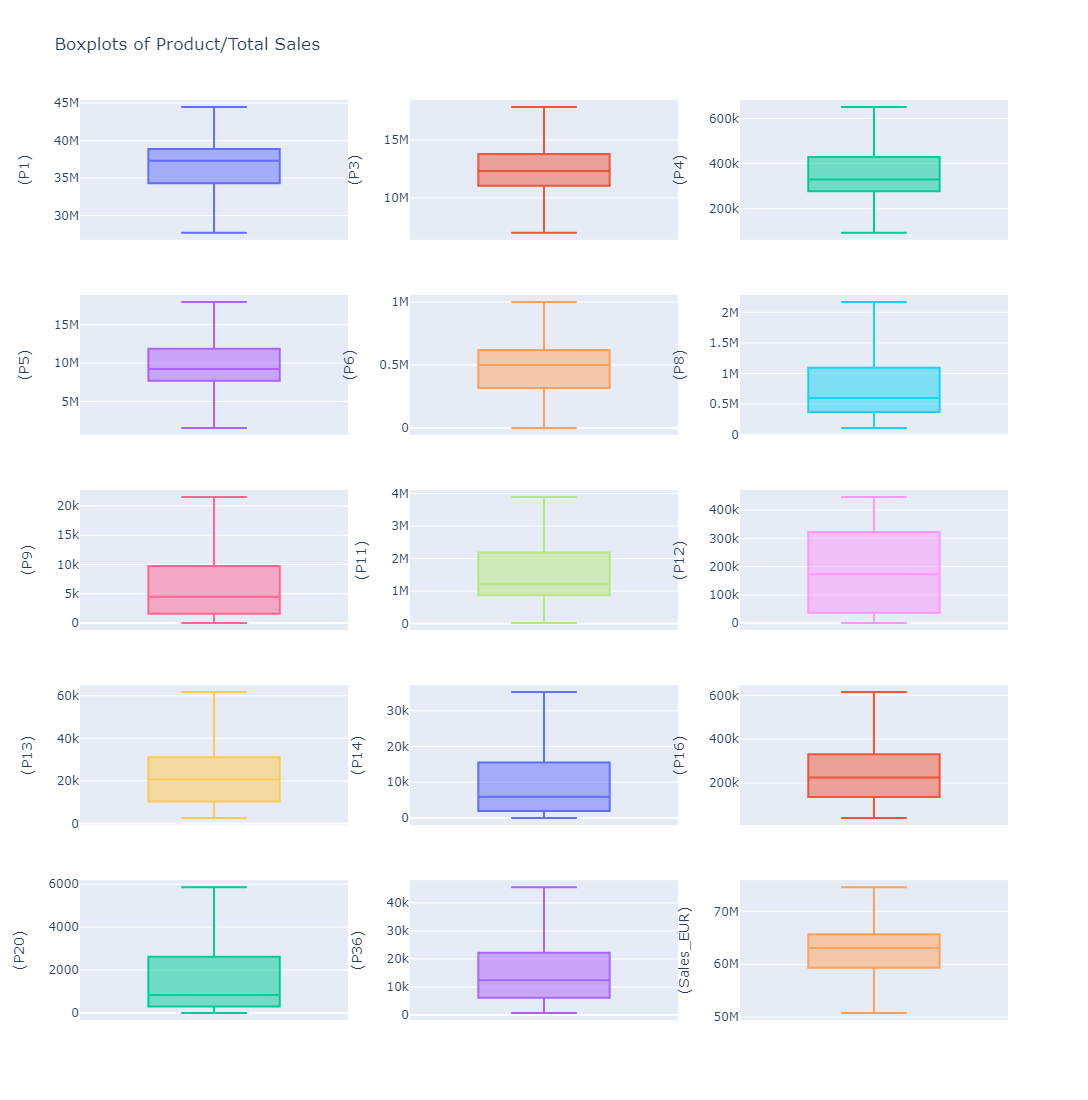

In [109]:
# Grid with all products
num_rows = 5 
num_cols = 3  
num_plots = num_rows * num_cols
fig = make_subplots(rows=num_rows, cols=num_cols)

# Loop para os subplots (Boxplots)
for i, product in enumerate(prod_list[:num_plots]):
    row = i // num_cols + 1
    col = i % num_cols + 1
    fig.add_trace(go.Box(y=sales_df[product], name=''), row=row, col=col)
    fig.update_yaxes(title_text=f"({product})", row=row, col=col)
fig.update_layout(title='Boxplots of Product/Total Sales',
                  height=1100, width=1400,
                  showlegend=False)
fig.show()

All good now.

<a id = 'Features'></a>

### Feature Engineering

[Back to Data Preparation](#DataPreparation)

In [110]:


dfs_final = {'market_final': market_final, 'ir_final': ir_final, 'cpi_final': cpi_final, 'er_final': er_final, 'effective_er_final': effective_er_final, 
           'Unemployment_r_final': Unemployment_r_final, 'cci_final': cci_final, 'bci_final': bci_final, 'bus_tend_manu_final': bus_tend_manu_final, 
           'bus_tend_const_final': bus_tend_const_final, 'conflict_dt_final': conflict_dt_final, siemens_stocks_final}

# 'GDP_final': GDP_final will not be consider 


for df_name, df in dfs_EDA.items():
    fig = px.line(df, x=df.index, y=df.columns, title=f'Line Plot for {df_name}')
    fig.show()

SyntaxError: ':' expected after dictionary key (2612484620.py, line 3)

#### `market_pct_final`

In [111]:
market_pct_final = market_final.pct_change(periods=1) * 100

# Renomeando as colunas com sufixo "%Change"
market_pct_final.columns = [f"{col} %var" for col in market_pct_final.columns]

market_pct_final.head()

CHN_M&E_Prod %var  CHN_M&E_Ship %var  FRA_M&E_Prod %var  \
2017-10                NaN                NaN                NaN   
2017-11          -1.470588          -1.470588          -6.481481   
2017-12          18.407960          18.407960           0.000000   
2018-01         -31.092437         -31.092437          -9.900990   
2018-02           0.000000           0.000000           1.098901   

         FRA_M&E_Ship %var  DEU_M&E_Prod %var  DEU_M&E_Ship %var  \
2017-10                NaN                NaN                NaN   
2017-11          -0.854701          18.018018          19.834711   
2017-12           1.724138          -0.763359           4.137931   
2018-01         -11.864407         -17.692308         -22.516556   
2018-02           0.961538           1.869159           1.709402   

         ITA_M&E_Prod %var  ITA_M&E_Ship %var  JPN_M&E_Prod %var  \
2017-10                NaN                NaN                NaN   
2017-11          -0.892857           3.448276           4.273504   
2017-12         -19.819820          10.000000           4.098361   
2018-01           7.865169         -34.848485         -11.811024   
2018-02           7.291667          17.441860           7.142857   

         JPN_M&E_Ship %var  GBR_M&E_Prod %var  USA_M&E_Prod %var  \
2017-10                NaN                NaN                NaN   
2017-11           5.172414           4.587156          -1.851852   
2017-12           6.557377         -10.526316          -2.830189   
2018-01         -12.307692           1.960784           1.941748   
2018-02           6.140351          -2.884615           2.857143   

         EU_M&E_Prod %var  EU_M&E_Ship %var  WLD_P_Metals %var  \
2017-10               NaN               NaN                NaN   
2017-11          6.956522         10.000000          -0.355023   
2017-12         -4.878049          2.272727          -0.507450   
2018-01        -10.256410        -19.259259           5.252302   
2018-02          2.857143          3.669725          -0.134033   

         WLD_P_Energy %var  WLD_P_Minerals %var  WLD_P_Natural_Gas %var  \
2017-10                NaN                  NaN                     NaN   
2017-11           7.737446             0.083947                5.890787   
2017-12           2.381265             0.778818               -0.798589   
2018-01           8.140540             5.302584               15.732026   
2018-02          -6.063384             0.045168              -16.257959   

         WLD_P_Crude_Oil %var  WLD_P_Copper %var  \
2017-10                   NaN                NaN   
2017-11              9.139323           0.276697   
2017-12              2.083611           0.110376   
2018-01              8.241820           3.395808   
2018-02             -4.177112          -0.842398   

         USA_Producer_Prices_Elect %var  ITA_Producer_Prices_Elect %var  \
2017-10                             NaN                             NaN   
2017-11                        0.000000                             0.0   
2017-12                        0.000000                             0.0   
2018-01                        0.000000                             0.0   
2018-02                        0.943396                             0.0   

         FRA_Producer_Prices_Elect %var  DEU_Producer_Prices_Elect %var  \
2017-10                             NaN                             NaN   
2017-11                        0.000000                        0.000000   
2017-12                        0.000000                        0.000000   
2018-01                        0.990105                        0.934579   
2018-02                        0.000000                        0.000000   

         CHN_Producer_Prices_Elect %var  USA_Prod_Index_M&E %var  \
2017-10                             NaN                      NaN   
2017-11                        0.000000                -1.869159   
2017-12                       -1.030928                -2.857143   
2018-01                        1.04166

#### `interest_rates`

In [112]:
 'Unemployment_rates': Unemployment_rates, 'business_tend_manu': business_tend_manu, 
           'business_tend_const': business_tend_const,

SyntaxError: illegal target for annotation (1569419861.py, line 1)

In [113]:
Unemployment_r_final = Unemployment_rates.copy()

In [114]:
bus_tend_const_final = business_tend_const.copy()

In [115]:
bus_tend_manu_final = business_tend_manu.copy()

In [116]:
ir_final = interest_rates.copy()

In [117]:
ir_final = interest_rates.copy()

In [118]:
# Copiar o DataFrame original
ir_final = interest_rates.copy()
ir_pct_final = interest_rates.copy()

# Calcular as mudanças percentuais
ir_pct_final = ir_pct_final.pct_change(periods=1) * 100

# Adicionar sufixo às colunas de mudança percentual
ir_pct_final.columns = [f"{col} IR%var" for col in ir_pct_final.columns]

# Concatenar as colunas de mudança percentual com o DataFrame original
interest_rates = pd.concat([interest_rates, ir_pct_final], axis=1)

# Calcular a média das mudanças percentuais para cada mês e armazenar em uma nova coluna
ir_final['Avg_IR%var'] = ir_final[avg_list].mean(axis=1)
ir_final_lag['Avg_IR%var'] = rates_df_lag[avg_list].mean(axis=1)

NameError: name 'avg_list' is not defined

In [119]:
 #Create a new DataFrame by dropping the columns for Russia and its corresponding IR%Change column from 'ir_pivot', and then filter it to only include data from October 2017 to April 2022. Fill any missing values with 2.9, due to mean
#ir_pct__lag = ir_pivot.drop(['Russia','Russia IR%Change'], axis = 1)['2017-10':].fillna(2.9)

# Create a new DataFrame by dropping the columns for Russia and its corresponding IR%Change column from 'ir_pivot', and then filter it to only include data from October 2017 to April 2022. Fill any missing values with 2.9, due to mean
#ir_pct_final = ir_pivot.drop(['Russia','Russia IR%Change'], axis = 1)['2017-10':].fillna(2.9)

### `cpi_final': cpi_final`

In [120]:
# Copiar o DataFrame original
cpi_pct_final = cpi_final.copy()

# Calcular as mudanças percentuais
cpi_pct_final = cpi_pct_final.pct_change(periods=1) * 100

# Adicionar sufixo às colunas de mudança percentual
cpi_pct_final.columns = [f"{col} CPI%Change" for col in cpi_pct_final.columns]

# Concatenar as colunas de mudança percentual com o DataFrame original
cpi_final = pd.concat([cpi_final, cpi_pct_final], axis=1)

# Calcular a média das mudanças percentuais para cada mês e armazenar em uma nova coluna
cpi_final['Avg_CPI%var'] = cpi_final.mean(axis=1)

#### `er_final`

In [121]:
# Copiar o DataFrame original
er_pct_final = er_final.copy()

# Calcular as mudanças percentuais
er_pct_final = er_pct_final.pct_change(periods=1) * 100

# Adicionar sufixo às colunas de mudança percentual
er_pct_final.columns = [f"{col} ER%var" for col in er_pct_final.columns]

# Descartar as colunas originais
er_final.drop(columns=er_final.columns, inplace=True)

# Concatenar as colunas de mudança percentual com o DataFrame original
er_final = pd.concat([er_final, er_pct_final], axis=1)

# Calcular a média das mudanças percentuais para cada mês e armazenar em uma nova coluna
er_final['Avg_ER%var'] = er_final.mean(axis=1)

#### `effective_er_final`

In [122]:
# Copiar o DataFrame original
effective_er_pct_final = effective_er_final.copy()

# Calcular as mudanças percentuais
effective_er_pct_final = effective_er_pct_final.pct_change(periods=1) * 100

# Adicionar sufixo às colunas de mudança percentual
effective_er_pct_final.columns = [f"{col} Effective_ER%var" for col in effective_er_pct_final.columns]

# Descartar as colunas originais
effective_er_final.drop(columns=effective_er_final.columns, inplace=True)

# Concatenar as colunas de mudança percentual com o DataFrame original
effective_er_final = pd.concat([effective_er_final, effective_er_pct_final], axis=1)

# Calcular a média das mudanças percentuais para cada mês e armazenar em uma nova coluna
effective_er_final['Avg_Effective_ER%var'] = effective_er_final.mean(axis=1)

NameError: name 'effective_er_final' is not defined

#### `Unemployment_r_final`

In [123]:
# Copiar o DataFrame original
unemployment_r_pct_final = Unemployment_r_final.copy()

# Calcular as mudanças percentuais
unemployment_r_pct_final = unemployment_r_pct_final.pct_change(periods=1) * 100

# Adicionar sufixo às colunas de mudança percentual
unemployment_r_pct_final.columns = [f"{col} Unemployment_r%Change" for col in unemployment_r_pct_final.columns]

# Descartar as colunas originais
Unemployment_r_final.drop(columns=Unemployment_r_final.columns, inplace=True)

# Concatenar as colunas de mudança percentual com o DataFrame original
Unemployment_r_final = pd.concat([Unemployment_r_final, unemployment_r_pct_final], axis=1)

# Calcular a média das mudanças percentuais para cada mês e armazenar em uma nova coluna
Unemployment_r_final['Avg_Unemployment_r%Change'] = Unemployment_r_final.mean(axis=1)

<a id = 'MergingData'></a>

### Merging Datasets 

[Back to Data Preparation](#DataPreparation)

In [124]:
#dfs_concat = {'Market_df': Market_df, 'interest_rates': interest_rates, 'cpi_df': cpi_df, 'exchange_rates': exchange_rates, 'effective_exchange_rates': effective_exchange_rates, 'Unemployment_rates': Unemployment_rates, 'cci_df': cci_df, 'bci_df': bci_df, 'business_tend_manu': business_tend_manu, 'business_tend_const': business_tend_const, 'conflict_data': conflict_data, 'siemens_stocks': siemens_stocks} 

In [125]:
dfs_final = {'market_final': market_final, 
             'ir_final': ir_final, 
             'cpi_final': cpi_final, 
             'er_final': er_final, 
             'effective_er_final': effective_er_final, 
             'Unemployment_r_final': Unemployment_r_final, 
             'cci_final': cci_final, 
             'bci_final': bci_final, 
             'bus_tend_manu_final': bus_tend_manu_final, 
             'bus_tend_const_final': bus_tend_const_final, 
             'conflict_dt_final': conflict_dt_final, 
             'siemens_stocks_final': siemens_stocks_final}

#final_df = pd.concat(dfs_final.values(), axis=1, keys=dfs_final.keys())
final_df = pd.concat(dfs_final.values(), axis=1)

NameError: name 'effective_er_final' is not defined

In [126]:
final_df.head()

NameError: name 'final_df' is not defined

In [127]:
final_df.shape

NameError: name 'final_df' is not defined

In [128]:
#final_df.dropna(axis=1, inplace=True)

In [129]:
# Counting the number of NaN values in each column of the 'final_df' DataFrame and assigning the result to the 'nan_values' Series
nan_values = final_df.isna().sum()

# Selecting only the columns in 'nan_values' that have at least one NaN value and displaying the result
nan_values[nan_values > 0]

NameError: name 'final_df' is not defined

In [130]:
# Find columns with no variation
no_variation_cols = []
for col in final_df.columns:
    if final_df[col].nunique() == 1:
        print(col)
        no_variation_cols.append(col)

# Drop columns with no variation
final_df.drop(no_variation_cols, axis=1, inplace=True)

# Print amount of columns removed
print(f"{len(no_variation_cols)} columns with no variation have been removed.")

NameError: name 'final_df' is not defined

In [131]:
final_lag = final_df.copy()

# Define the target range for the shifted data
target_range = pd.date_range(start='2018-10', end='2022-04', freq='MS')

# Create a list to store lagged features
lagged_dfs = []

# Iterate over each column in the original DataFrame
for col in final_lag.columns:
    # Iterate over lag values from 1 to 12
    for lag in range(1, 13):
        # Create a new column with lagged data
        lagged_data = final_lag[col].shift(lag)
        # Rename the column to include lag information
        lagged_data = lagged_data.rename(f"{col}_lag{lag}")
        # Append the lagged data to the list
        lagged_dfs.append(lagged_data)

# Concatenate all lagged DataFrames along the columns axis
lagged_features = pd.concat(lagged_dfs, axis=1)

print('Now we have', len(lagged_features.columns), 'features to select from*')


NameError: name 'final_df' is not defined

In [132]:
final_df_lag = final_df.copy()

NameError: name 'final_df' is not defined

In [133]:
import os

# Diretório onde você deseja salvar o arquivo CSV
directory = r'C:\Users\catar\OneDrive\Ambiente de Trabalho\NOVA IMS\Data Science For Marketing\Project Notebook\Business Case 2'

# Caminho completo para o arquivo CSV
file_path_final_df_lag = os.path.join(directory, 'final_df_lag.csv')
file_path_sales_df = os.path.join(directory, 'sales_df.csv')

# Salvar final_df_lag e sales_df em arquivos CSV com índice
final_df_lag.to_csv(file_path_final_df_lag)
sales_df.to_csv(file_path_sales_df)


NameError: name 'final_df_lag' is not defined

In [134]:
# Set the target index range
target_index_range =  sales_df['Sales_EUR'][1:].index

mi_scores = []

# Calculate the mutual information score for each lag
for feature in final_df.columns:
    
    # Calculate the mutual information score
    mi_score = mutual_info_regression(final_df[[feature]]['2018-11':'2022-04'], sales_df['Sales_EUR'][1:], random_state=42)
    mi_scores.append(float(mi_score))
    
mi_df = pd.DataFrame({'feature': final_df.columns, 'mi_score': mi_scores})
mi_df.set_index('feature', inplace=True)

threshold = 0.15

possible_mi_removal = mi_df[mi_df['mi_score'] <= threshold ].index

print('Based on the mutual information score we could remove features below the',threshold,'treshold. It would remove',len(possible_mi_removal),'features, leaving',
      len(final_df.columns) - len(possible_mi_removal),'to work with.')

#final_df.drop(possible_mi_removal, axis=1, inplace=True)

mi_df = mi_df[mi_df['mi_score']>= threshold].sort_values('mi_score',ascending=False)
mi_df

NameError: name 'final_df' is not defined